# Capstone Project - House Price Prediction

## Group 8:

- Deivanai Kumaravel
- Dhiren Kumar Behera
- Fardeen Ahmad Khan
- T Abhishek
- Utsav Kejriwal

### Submission Date: 18th August 2023

# Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Datasets/innercity.xlsx')

In [ ]:
data.isnull().sum()

price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
living_measure15    0
lot_measure15       0
furnished           0
year                0
month               0
day                 0
age                 0
City                0
dtype: int64

In [ ]:
data.describe()

,cid,price,room_bed,room_bath,living_measure,lot_measure,sight,quality,ceil_measure,basement,yr_renovated,zipcode,lat,living_measure15,lot_measure15,furnished
count,2.161300e+04,2.161300e+04,21505.000000,21505.000000,21596.000000,2.157100e+04,21556.000000,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,21613.000000,21447.000000,21584.000000,21584.000000
mean,4.580302e+09,5.401822e+05,3.371355,2.115171,2079.860761,1.510458e+04,0.234366,7.656857,1788.366556,291.522534,84.402258,98077.939805,47.560053,1987.065557,12766.543180,0.196720
std,2.876566e+09,3.673622e+05,0.930289,0.770248,918.496121,4.142362e+04,0.766438,1.175484,828.102535,442.580840,401.679240,53.505026,0.138564,685.519629,27286.987107,0.397528
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,290.000000,0.000000,0.000000,98001.000000,47.155900,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,0.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000,47.471000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000,47.571800,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068450e+04,0.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000,47.678000,2360.000000,10087.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,6210.000000,871200.000000,1.000000


In [ ]:
#drop cid
data.drop(columns = 'cid',inplace= True)

## Create three new columns Year, Month, Date from dayhours

In [ ]:
data['year'] = data['dayhours'].apply(lambda x: x[0:4])

In [ ]:
data['month'] = data['dayhours'].apply(lambda x: x[4:6])

In [ ]:
data['day'] = data['dayhours'].apply(lambda x: x[6:8])

In [ ]:
#validate the data
data[['dayhours', 'year', 'month','day']]

,dayhours,year,month,day
0,20150427T000000,2015,04,27
1,20150317T000000,2015,03,17
2,20140820T000000,2014,08,20
3,20141010T000000,2014,10,10
4,20150218T000000,2015,02,18
...,...,...,...,...
21608,20150310T000000,2015,03,10
21609,20140521T000000,2014,05,21
21610,20140905T000000,2014,09,05
21611,20150206T000000,2015,02,06


In [ ]:
#drop dayhours column
data.drop(columns='dayhours',inplace=True)

In [ ]:
#dropping total area column since its just a cumulative field
data.drop(columns='total_area',inplace=True)

## Checking for Outliers, Treating Null values and irrelevant data:

In [ ]:
data['room_bed'].unique()

array([ 4.,  2.,  3.,  1.,  5.,  6., nan,  7., 10.,  8.,  0.,  9., 33.,
       11.])

In [ ]:
i = data[(data['room_bed']==33.0)].index
print(i)

Int64Index([16913], dtype='int64')


In [ ]:
data.drop(i,inplace = True)

In [ ]:
data['room_bed'].unique()

array([ 4.,  2.,  3.,  1.,  5.,  6., nan,  7., 10.,  8.,  0.,  9., 11.])

In [ ]:
data['room_bed'].median()

3.0

In [ ]:
data['room_bed'].fillna(3.0,inplace=True)

In [ ]:
data['room_bed'].isnull().sum()

0

Null Values Removed from `room_bed` column

In [ ]:
data['yr_built'].unique()

array([1966, 1948, 2009, 1924, 1994, 2005, 1978, 1983, 2012, 1912, 1990,
       1967, 1919, 1908, 1950, 2000, 2013, 1943, 1922, 1977, 2004, 1935,
       1964, 1945, 1987, 2008, 1940, 2003, 1988, 1985, 1998, 1995, 1946,
       1984, 1958, 1963, 1942, 2014, 1971, 1936, 1954, 1923, 2002, 1972,
       2007, 1930, 1962, 1999, 1953, 1965, 2010, 1997, 2006, 1979, 1996,
       1992, 1968, 1980, 1981, 1969, 2001, 1929, 1952, 1916, 1976, 1974,
       1920, 1931, 1975, 1960, 1900, '$', 1986, 1989, 1906, 1955, 1956,
       1915, 1941, 1993, 2011, 1925, 1947, 1991, 1926, 1927, 1951, 1961,
       1932, 1917, 1928, 1959, 1921, 1911, 1949, 1982, 1913, 1957, 1914,
       1938, 1973, 1937, 1944, 1970, 1901, 1907, 1939, 1918, 1934, 1904,
       2015, 1909, 1910, 1905, 1902, 1933, 1903, nan], dtype=object)

In [ ]:
lst = data.query("yr_built == '$'").index

In [ ]:
for i in lst:
  data.drop(i,inplace=True)

In [ ]:
data['yr_built'].unique()

array([1966, 1948, 2009, 1924, 1994, 2005, 1978, 1983, 2012, 1912, 1990,
       1967, 1919, 1908, 1950, 2000, 2013, 1943, 1922, 1977, 2004, 1935,
       1964, 1945, 1987, 2008, 1940, 2003, 1988, 1985, 1998, 1995, 1946,
       1984, 1958, 1963, 1942, 2014, 1971, 1936, 1954, 1923, 2002, 1972,
       2007, 1930, 1962, 1999, 1953, 1965, 2010, 1997, 2006, 1979, 1996,
       1992, 1968, 1980, 1981, 1969, 2001, 1929, 1952, 1916, 1976, 1974,
       1920, 1931, 1975, 1960, 1900, 1986, 1989, 1906, 1955, 1956, 1915,
       1941, 1993, 2011, 1925, 1947, 1991, 1926, 1927, 1951, 1961, 1932,
       1917, 1928, 1959, 1921, 1911, 1949, 1982, 1913, 1957, 1914, 1938,
       1973, 1937, 1944, 1970, 1901, 1907, 1939, 1918, 1934, 1904, 2015,
       1909, 1910, 1905, 1902, 1933, 1903, nan], dtype=object)

### 14 rows from the data set where having $ value in year_built col and NaN values in living and lot measures, hence those have been removed

In [ ]:
data['yr_built'].fillna(2015,inplace=True)

In [ ]:
data.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,year,month,day
0,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,...,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,2015,04,27
1,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,...,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,2015,03,17
2,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,...,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,2014,08,20
3,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,...,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,2014,10,10
4,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,...,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,2015,02,18


In [ ]:
data['room_bath'].unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75, 5.  ,  nan, 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25,
       6.  , 0.  , 1.25, 5.75, 7.5 , 6.5 , 0.5 , 7.75, 6.25])

In [ ]:
data['room_bath'].mode()

0    2.5
Name: room_bath, dtype: float64

In [ ]:
data['room_bath'].fillna(2.5,inplace=True)

### There still remains the question of how to replace values like 0.5 and 0.7 for room_bath

In [ ]:
data['living_measure'].isnull().sum()

17

In [ ]:
data['living_measure'].mean()

2080.1975348686346

In [ ]:
data['living_measure'].fillna(2080.19,inplace=True)

In [ ]:
data['lot_measure'].isnull().sum()

42

In [ ]:
data['lot_measure'].median()

7619.0

In [ ]:
data['lot_measure'].fillna(7619.0,inplace=True)

In [ ]:
data['furnished'].unique()

array([ 0.,  1., nan])

In [ ]:
data['furnished'].mode()

0    0.0
Name: furnished, dtype: float64

In [ ]:
data['furnished'].fillna(0.0,inplace=True)

In [ ]:
data.drop(columns="lat",inplace=True)
data.drop(columns="long",inplace=True)

### Ceil or Number of Floors in a House: Null values and $ values replaced with 2, as all houses in the US have at least 2 floors

In [ ]:
data['ceil'].replace('$',2,inplace=True)

In [ ]:
data['ceil'].fillna(2,inplace=True)

In [ ]:
data['coast'].mode()

0    0
Name: coast, dtype: object

In [ ]:
data['coast'].replace('$',0,inplace=True)
data['coast'].fillna(0,inplace=True)

In [ ]:
data['coast'].unique()

array([0., 1.])

In [ ]:
data['sight'].unique()

array([ 0.,  4.,  2.,  3.,  1., nan])

In [ ]:
data.query("sight == 0").count()

price               19423
room_bed            19423
room_bath           19423
living_measure      19423
lot_measure         19423
ceil                19423
coast               19423
sight               19423
condition           19423
quality             19423
ceil_measure        19423
basement            19423
yr_built            19423
yr_renovated        19423
zipcode             19423
living_measure15    19330
lot_measure15       19394
furnished           19423
year                19423
month               19423
day                 19423
dtype: int64

In [ ]:
data['sight'].fillna(0,inplace=True)

In [ ]:
#data.query("condition == '$'")
data['condition'].unique()

array([3, 4, 5, 2, nan, 1, '$'], dtype=object)

In [ ]:
data['condition'].mode()

0    3
Name: condition, dtype: object

In [ ]:
data['condition'].replace('$',3,inplace=True)

In [ ]:
data['condition'].fillna(3,inplace=True)

In [ ]:
data['quality'].value_counts(dropna=False)

7.0     8972
8.0     6063
9.0     2614
6.0     2037
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
NaN        1
Name: quality, dtype: int64

In [ ]:
data['quality'].fillna(7,inplace=True)

In [ ]:
data['ceil_measure'].isnull().sum()

1

In [ ]:
data['ceil_measure'].median()

1560.0

In [ ]:
data['ceil_measure'].fillna(1560.0,inplace=True)

In [ ]:
data['basement'].value_counts()

0.0       13115
600.0       220
700.0       218
500.0       214
800.0       206
          ...  
4130.0        1
2050.0        1
784.0         1
518.0         1
2180.0        1
Name: basement, Length: 306, dtype: int64

In [ ]:
data['basement'].fillna(0,inplace=True)

In [ ]:
data['zipcode'].isnull().sum()

0

In [ ]:
data['living_measure15'].median()

1840.0

In [ ]:
data['living_measure15'].fillna(1840.0,inplace=True)

In [ ]:
data['lot_measure15'].median()

7620.0

In [ ]:
data['lot_measure15'].fillna(7620.0,inplace=True)

In [ ]:
data['age'] = data['yr_built'].apply(lambda x:2015-x)

In [ ]:
data[['yr_built','age']]

,yr_built,age
0,1966,49
1,1948,67
2,1966,49
3,2009,6
4,1924,91
...,...,...
21608,1996,19
21609,1939,76
21610,1978,37
21611,1997,18


In [ ]:
data['age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 21598 entries, 0 to 21612
Series name: age
Non-Null Count  Dtype
--------------  -----
21598 non-null  int64
dtypes: int64(1)
memory usage: 337.5 KB


In [ ]:
data.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,year,month,day,age
0,600000,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,8.0,...,1966,0,98034,2020.0,8660.0,0.0,2015,04,27,49
1,190000,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,6.0,...,1948,0,98118,1660.0,4100.0,0.0,2015,03,17,67
2,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,8.0,...,1966,0,98118,2620.0,2433.0,0.0,2014,08,20,49
3,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,8.0,...,2009,0,98002,2030.0,3794.0,0.0,2014,10,10,6
4,450000,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,7.0,...,1924,0,98118,1120.0,5100.0,0.0,2015,02,18,91


In [ ]:
data= data.astype({'price':float,'room_bath':int,'lot_measure':float,
                   'ceil':object,'condition':object,'coast':object,
                   'quality':object,'ceil_measure':float,'basement':float,
                   'living_measure15':float,'lot_measure15':float,
                   'furnished':object,'year':object,'month':object,'day':object})

## Changing Zipcode to City Name

In [ ]:
zip_codes = pd.read_csv("/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Datasets/usa_zipcode_of_wa-1564j.csv",index_col=None)

In [ ]:
zip_info = zip_codes[['zip','City']]

In [ ]:
zip_info['City'].fillna(0,inplace=True)
zip_info['City'].isnull().sum()

<ipython-input-12-9d766a62cabc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_info['City'].fillna(0,inplace=True)


0

In [ ]:
zip_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     694 non-null    object
 1   City    696 non-null    object
dtypes: object(2)
memory usage: 11.0+ KB


In [ ]:
zip_codes.head()

,zip,Zipcode name,City,State,County Name
0,98520,"ABERDEEN, WA",ABERDEEN,WA,GRAYS HARBOR
1,98220,"ACME, WA",ACME,WA,WHATCOM
2,99101,"ADDY, WA",ADDY,WA,STEVENS
3,98522,"ADNA, WA",ADNA,WA,LEWIS
4,99001,"AIRWAY HEIGHTS, WA",AIRWAY HEIGHTS,WA,SPOKANE


In [ ]:
i = zip_info[zip_info['zip']=='For more information, kindly visit : www.downloadexcelfiles.com'].index.values.astype(int)[0]
#print(zip_info.loc[i,'zip'])
zip_info.drop(i,inplace=True)

<ipython-input-16-397a9097930c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_info.drop(i,inplace=True)


In [ ]:
zip_info['zip'].unique()

In [ ]:
e_list = []
for m_zip in data['zipcode']:
  for n_zip in zip_info['zip']:
    if(m_zip == int(n_zip)):
      print("True",m_zip,n_zip)
      i = zip_info[zip_info['zip']==n_zip].index.values.astype(int)[0]
      e_list.append(zip_info.loc[i,'City'])

In [ ]:
data.drop('zipcode',axis=1,inplace=True)

In [ ]:
data.to_excel('/content/drive/MyDrive/Datasets/cleaned_innercity.xlsx',index=False)

## Creating Scaled Data with Encoded City Value

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaled_data = pd.DataFrame()

In [ ]:
data.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,yr_built,yr_renovated,living_measure15,lot_measure15,furnished,year,month,day,age,City
0,600000.0,4,1,3050.0,9440.0,1.0,0,0,3,8,...,1966,0,2020.0,8660.0,0,2015,4,27,49,KIRKLAND
1,190000.0,2,1,670.0,3101.0,1.0,0,0,4,6,...,1948,0,1660.0,4100.0,0,2015,3,17,67,SEATTLE
2,735000.0,4,2,3040.0,2415.0,2.0,1,4,3,8,...,1966,0,2620.0,2433.0,0,2014,8,20,49,SEATTLE
3,257000.0,3,2,1740.0,3721.0,2.0,0,0,3,8,...,2009,0,2030.0,3794.0,0,2014,10,10,6,AUBURN
4,450000.0,2,1,1120.0,4590.0,1.0,0,0,3,7,...,1924,0,1120.0,5100.0,0,2015,2,18,91,SEATTLE


In [ ]:
dummy_data = data[['price',
'room_bed',
'room_bath',
'living_measure',
'lot_measure',
'ceil',
'coast',
'sight',
'condition',
'quality',
'ceil_measure',
'basement',
'yr_built',
'living_measure15',
'lot_measure15',
'furnished']]
dummy_data.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,living_measure15,lot_measure15,furnished
0,600000.0,4,1,3050.0,9440.0,1.0,0,0,3,8,1800.0,1250.0,1966,2020.0,8660.0,0
1,190000.0,2,1,670.0,3101.0,1.0,0,0,4,6,670.0,0.0,1948,1660.0,4100.0,0
2,735000.0,4,2,3040.0,2415.0,2.0,1,4,3,8,3040.0,0.0,1966,2620.0,2433.0,0
3,257000.0,3,2,1740.0,3721.0,2.0,0,0,3,8,1740.0,0.0,2009,2030.0,3794.0,0
4,450000.0,2,1,1120.0,4590.0,1.0,0,0,3,7,1120.0,0.0,1924,1120.0,5100.0,0


In [ ]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(dummy_data)


In [ ]:
scaled_data = pd.DataFrame(scaled_data,columns=['price',
'room_bed',
'room_bath',
'living_measure',
'lot_measure',
'ceil',
'coast',
'sight',
'condition',
'quality',
'ceil_measure',
'basement_measure',
'yr_built',
'living_measure15',
'lot_measure15',
'furnished'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
Lab = LabelEncoder()

In [ ]:
dummy_data['City'] = Lab.fit_transform(data['City'])

<ipython-input-48-982ec086902a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_data['City'] = Lab.fit_transform(data['City'])


In [ ]:
dummy_data.head()
#data['City'].unique()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,living_measure15,lot_measure15,furnished,City
0,600000.0,4,1,3050.0,9440.0,1.0,0,0,3,8,1800.0,1250.0,1966,2020.0,8660.0,0,12
1,190000.0,2,1,670.0,3101.0,1.0,0,0,4,6,670.0,0.0,1948,1660.0,4100.0,0,20
2,735000.0,4,2,3040.0,2415.0,2.0,1,4,3,8,3040.0,0.0,1966,2620.0,2433.0,0,20
3,257000.0,3,2,1740.0,3721.0,2.0,0,0,3,8,1740.0,0.0,2009,2030.0,3794.0,0,0
4,450000.0,2,1,1120.0,4590.0,1.0,0,0,3,7,1120.0,0.0,1924,1120.0,5100.0,0,20


In [ ]:
scaled_data['City'] = dummy_data['City']

In [ ]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21598 entries, 0 to 21597
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21598 non-null  float64
 1   room_bed          21598 non-null  float64
 2   room_bath         21598 non-null  int64  
 3   living_measure    21598 non-null  float64
 4   lot_measure       21598 non-null  float64
 5   ceil              21598 non-null  object 
 6   coast             21598 non-null  object 
 7   sight             21598 non-null  float64
 8   condition         21598 non-null  object 
 9   quality           21598 non-null  object 
 10  ceil_measure      21598 non-null  float64
 11  basement_measure  21598 non-null  float64
 12  yr_built          21598 non-null  float64
 13  living_measure15  21598 non-null  float64
 14  lot_measure15     21598 non-null  float64
 15  furnished         21598 non-null  object 
 16  City              21598 non-null  object

In [ ]:
scaled_data.to_excel('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Datasets/scaled_data.xlsx')

# Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Datasets/cleaned_innercity.xlsx',index_col=None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
data.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,living_measure15,lot_measure15,furnished,total_area,year,month,day,room_bath_ceil,age,City
0,600000,4,1,3050,9440,1.0,0,0,3,8,...,2020,8660,0,12490,2015,4,27,2,49,KIRKLAND
1,305000,3,1,1650,9480,1.0,0,0,3,7,...,1540,8400,0,11130,2014,8,18,2,38,KIRKLAND
2,450000,3,1,1340,7200,1.0,0,0,3,7,...,1730,8820,0,8540,2015,2,25,2,43,KIRKLAND
3,344950,3,2,1330,7419,1.0,0,0,3,7,...,1330,7297,0,8749,2014,12,11,2,30,KIRKLAND
4,405000,3,1,1670,6720,1.0,0,0,3,7,...,1670,7320,0,8390,2015,2,9,2,35,KIRKLAND


## Univariate Analysis

### Price Analysis

In [ ]:
median = data['price'].median()
mode = data['price'].mode()
print("Median:", median)
print("mode:", mode)

pd.options.display.float_format = '{:.0f}'.format
data.describe(include='all')['price']

Median: 450000.0
mode: 0    350000
1    450000
Name: price, dtype: int64


count      21598
unique       NaN
top          NaN
freq         NaN
mean      540248
std       367455
min        75000
25%       322000
50%       450000
75%       645000
max      7700000
Name: price, dtype: float64

In [ ]:
import numpy as np
print("0.5% properties prices are lower than",np.percentile(data['price'],0.5))
print("1% properties prices are lower than",np.percentile(data['price'],1))
print("5% properties prices are lower than",np.percentile(data['price'],5))
print("10% properties prices are lower than",np.percentile(data['price'],10))
print("25% properties prices are lower than",np.percentile(data['price'],25))
print("50% properties prices are lower than",np.percentile(data['price'],50))
print("75% properties prices are lower than",np.percentile(data['price'],75))
print("90% properties prices are lower than",np.percentile(data['price'],90))
print("95% properties prices are lower than",np.percentile(data['price'],95))
print("99% properties prices are lower than",np.percentile(data['price'],99))
print("99.5% properties prices are lower than",np.percentile(data['price'],99.5))

0.5% properties prices are lower than 133394.0
1% properties prices are lower than 153485.0
5% properties prices are lower than 210000.0
10% properties prices are lower than 245000.0
25% properties prices are lower than 322000.0
50% properties prices are lower than 450000.0
75% properties prices are lower than 645000.0
90% properties prices are lower than 887215.0
95% properties prices are lower than 1160000.0
99% properties prices are lower than 1970000.0
99.5% properties prices are lower than 2450149.9999999944


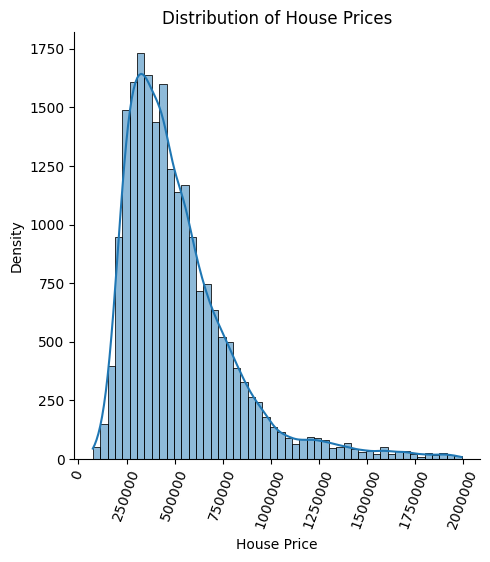

In [ ]:
truncated_data = data[data['price'] <2000000]
#fig = plt.figure(figsize=(10,10),dpi=150)
sns.displot(truncated_data['price'],bins=50,kde=True)

# Set labels and title
plt.xlabel('House Price')
plt.xticks(rotation=70)
#ticks=range(len(truncated_data)),
plt.ylabel('Density')
plt.title('Distribution of House Prices')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.savefig('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Visualizations/dist_house_price.png',dpi=150,bbox_inches='tight')
# Display the plot
plt.show()



<ipython-input-31-662cb893308e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=truncated_data['price'], shade=True)


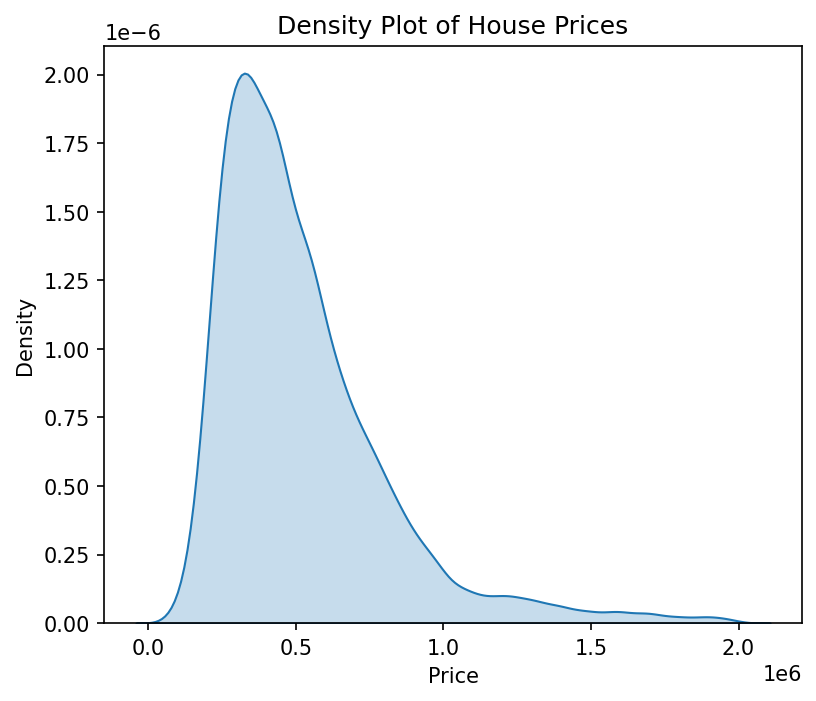

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.kdeplot(data=truncated_data['price'], shade=True)

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of House Prices')

# Display the plot
plt.savefig('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Visualizations/dense_house_price.png',dpi=150,bbox_inches='tight')
plt.show()

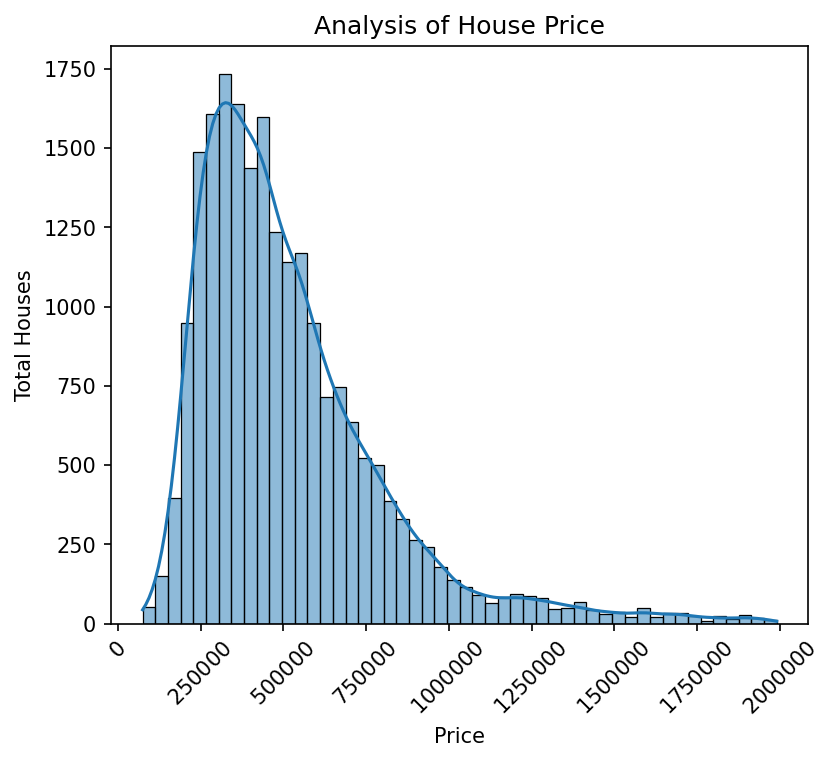

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
plt.title("Analysis of House Price")
plt.xlabel("Price")
plt.ylabel("Total Houses")
sns.histplot(data=truncated_data['price'],bins=50,kde=True)

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.savefig('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Visualizations/count_house_price.png',dpi=150,bbox_inches='tight')
plt.show()

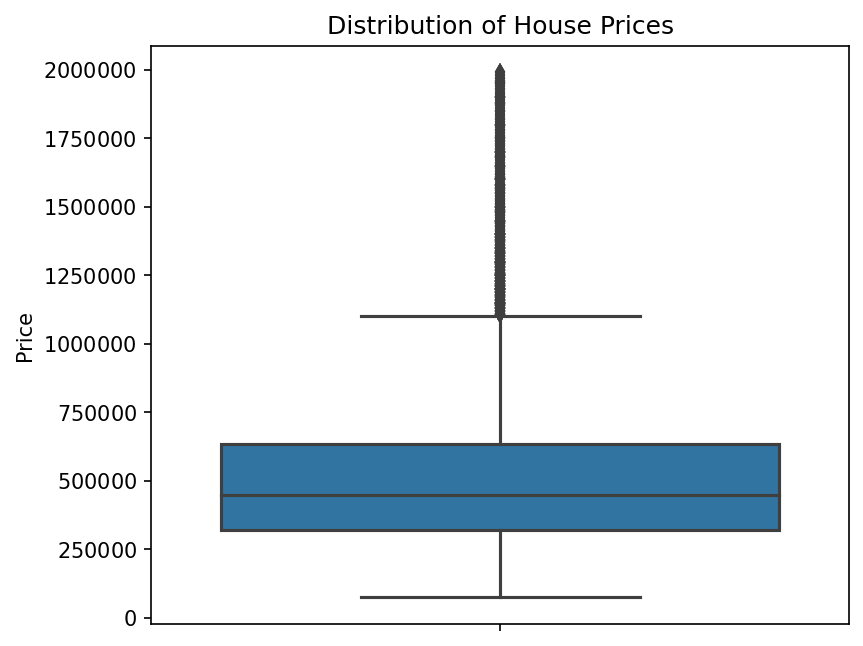

In [ ]:
truncated_data = data[data['price'] <2000000]
fig = plt.figure(figsize=(6,5),dpi=150)
sns.boxplot(data=truncated_data, y='price')

# Set labels and title
plt.ylabel('Price')
plt.title('Distribution of House Prices')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)
plt.savefig('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Visualizations/box_house_price.png',dpi=150,bbox_inches='tight')
# Display the plot
plt.show()


### Bed Rooms

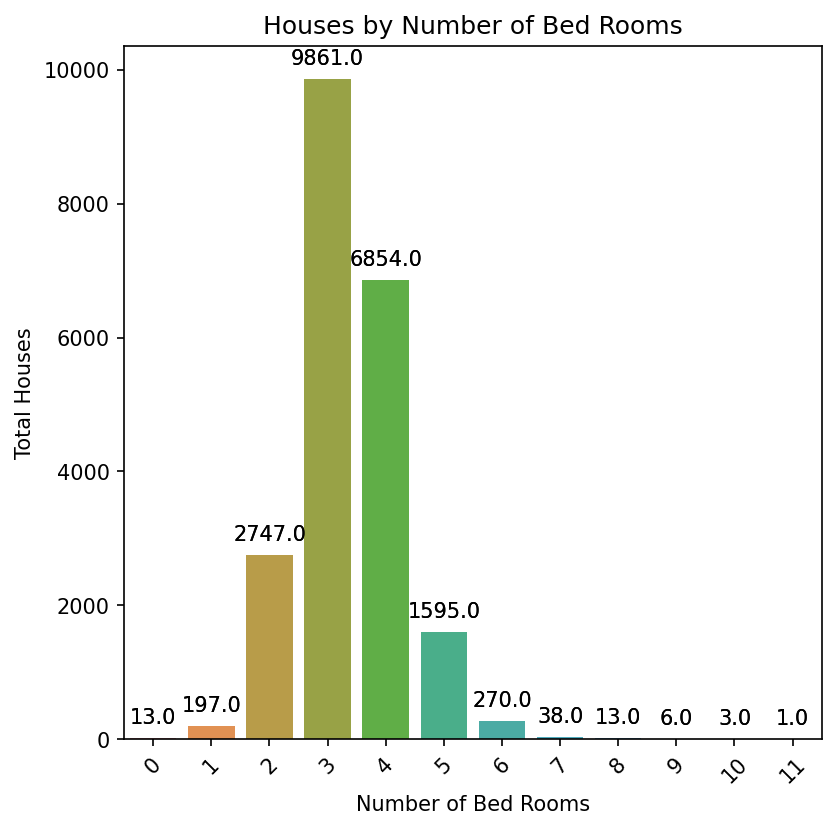

In [ ]:
fig = plt.figure(figsize=(6,6),dpi=150)
sns.countplot(data=data, x='room_bed')


# Add bar values
for p in sns.countplot(x='room_bed', data=data).patches:
    count = p.get_height()
    plt.annotate(count, (p.get_x() + p.get_width() / 2., count),
                 ha='center', va='bottom', xytext=(0, 5),
                  textcoords='offset points')

# Set labels and title
plt.xlabel('Number of Bed Rooms')
plt.ylabel('Total Houses')
plt.title('Houses by Number of Bed Rooms')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


<Axes: >

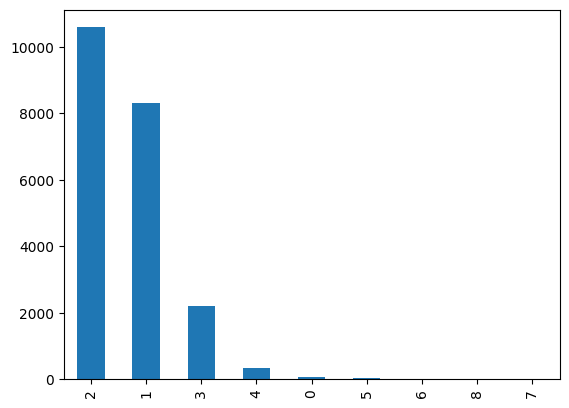

In [ ]:
data['room_bath'].value_counts().plot(kind='bar')

### Bath Rooms

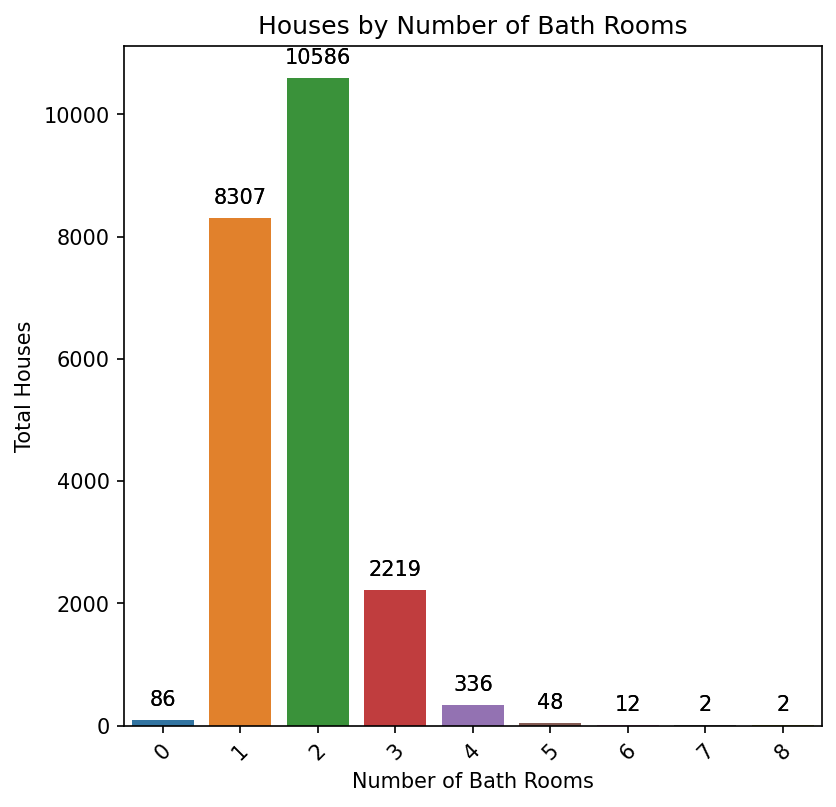

In [ ]:
fig = plt.figure(figsize=(6,6),dpi=150)
sns.countplot(data=data, x='room_bath')


# Add bar values
for p in sns.countplot(x='room_bath', data=data).patches:
    count = p.get_height()
    plt.annotate(count, (p.get_x() + p.get_width() / 2., count),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points')

# Set labels and title
plt.xlabel('Number of Bath Rooms')
plt.ylabel('Total Houses')
plt.title('Houses by Number of Bath Rooms')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


### Living Measure

In [ ]:
median = data['living_measure'].median()
mode = data['living_measure'].mode()
print("Median:", median)
print("mode:", mode)

pd.options.display.float_format = '{:.0f}'.format
data.describe(include='all')['living_measure']


Median: 1910.0
mode: 0    1300
Name: living_measure, dtype: int64


count    21598
unique     NaN
top        NaN
freq       NaN
mean      2080
std        919
min        290
25%       1430
50%       1910
75%       2550
max      13540
Name: living_measure, dtype: float64

In [ ]:
import numpy as np
print("0.5% properties prices are lower than",np.percentile(data['living_measure'],0.5))
print("1% properties prices are lower than",np.percentile(data['living_measure'],1))
print("5% properties prices are lower than",np.percentile(data['living_measure'],5))
print("10% properties prices are lower than",np.percentile(data['living_measure'],10))
print("25% properties prices are lower than",np.percentile(data['living_measure'],25))
print("50% properties prices are lower than",np.percentile(data['living_measure'],50))
print("75% properties prices are lower than",np.percentile(data['living_measure'],75))
print("90% properties prices are lower than",np.percentile(data['living_measure'],90))
print("95% properties prices are lower than",np.percentile(data['living_measure'],95))
print("99% properties prices are lower than",np.percentile(data['living_measure'],99))
print("99.5% properties prices are lower than",np.percentile(data['living_measure'],99.5))

0.5% properties prices are lower than 670.0
1% properties prices are lower than 720.0
5% properties prices are lower than 940.0
10% properties prices are lower than 1090.0
25% properties prices are lower than 1430.0
50% properties prices are lower than 1910.0
75% properties prices are lower than 2550.0
90% properties prices are lower than 3252.9999999999927
95% properties prices are lower than 3761.499999999978
99% properties prices are lower than 4980.0
99.5% properties prices are lower than 5584.239999999991


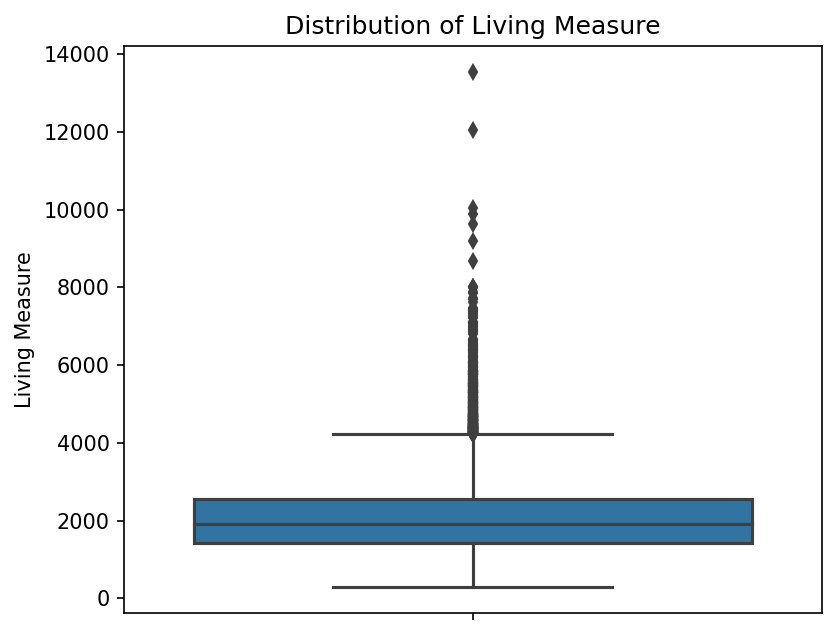

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.boxplot(data=data, y='living_measure')

# Set labels and title
plt.ylabel('Living Measure')
plt.title('Distribution of Living Measure')

# Display the plot
plt.show()


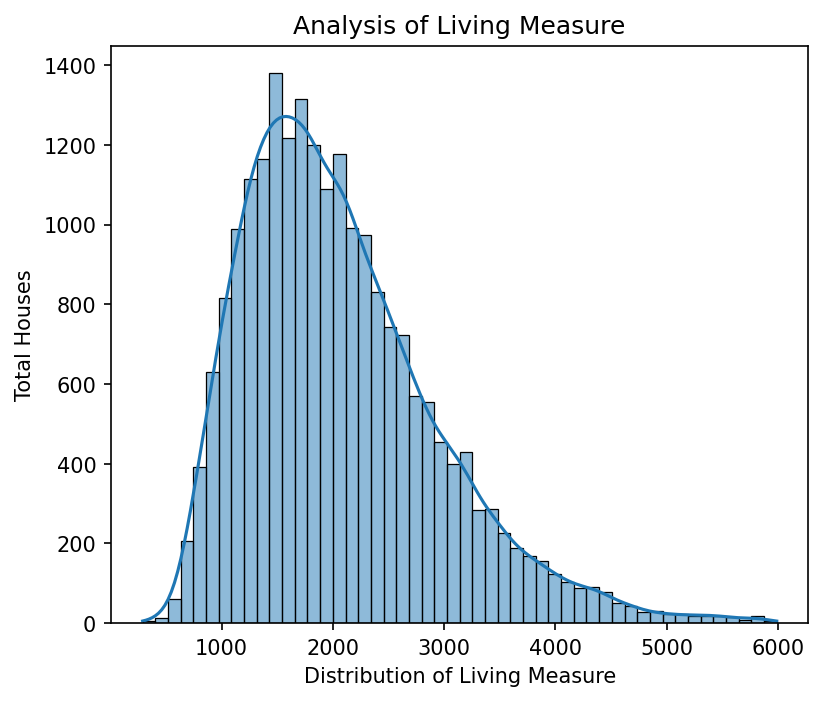

In [ ]:
truncated_measure = data[data['living_measure']<6000]
fig = plt.figure(figsize=(6,5),dpi=150)
plt.title("Analysis of Living Measure")
plt.xlabel("Distribution of Living Measure")
plt.ylabel("Total Houses")
sns.histplot(data=truncated_measure['living_measure'],bins=50,kde=True)
# Display the plot
plt.savefig('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Visualizations/liv_measure.png',dpi=150,bbox_inches='tight')
plt.show()

### Lot Measure

In [ ]:
median = data['lot_measure'].median()
mode = data['lot_measure'].mode()
print("Median:", median)
print("mode:", mode)

pd.options.display.float_format = '{:.0f}'.format
data.describe(include='all')['lot_measure']


Median: 7619.0
mode: 0    5000
Name: lot_measure, dtype: int64


count      21598
unique       NaN
top          NaN
freq         NaN
mean       15112
std        41434
min          520
25%         5040
50%         7619
75%        10689
max      1651359
Name: lot_measure, dtype: float64

In [ ]:
import numpy as np
print("0.5% properties prices are lower than",np.percentile(data['lot_measure'],0.5))
print("1% properties prices are lower than",np.percentile(data['lot_measure'],1))
print("5% properties prices are lower than",np.percentile(data['lot_measure'],5))
print("95% properties prices are lower than",np.percentile(data['lot_measure'],95))
print("99% properties prices are lower than",np.percentile(data['lot_measure'],99))

0.5% properties prices are lower than 905.0
1% properties prices are lower than 1012.97
5% properties prices are lower than 1800.0
95% properties prices are lower than 43354.049999999945
99% properties prices are lower than 213008.0


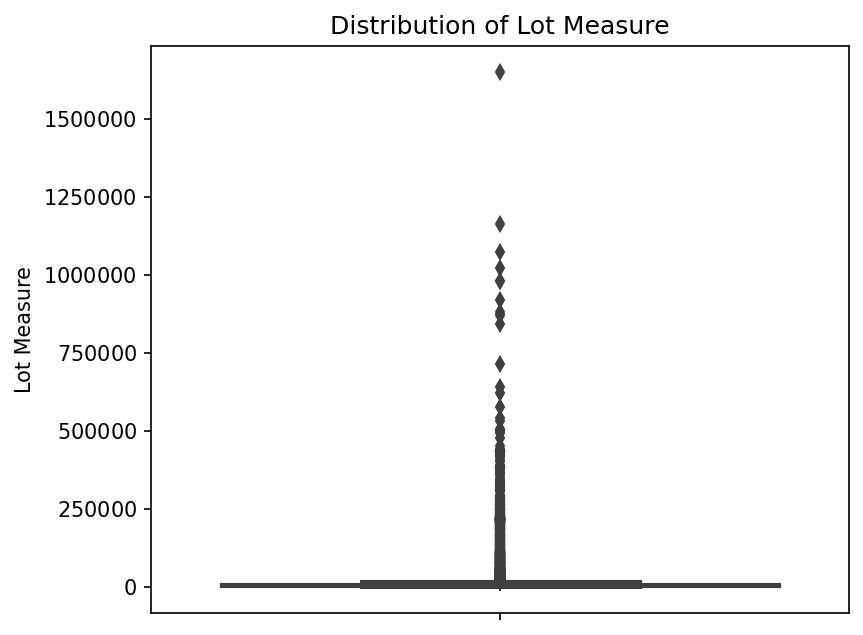

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.boxplot(data=data, y='lot_measure')

# Set labels and title
plt.ylabel('Lot Measure')
plt.title('Distribution of Lot Measure')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()


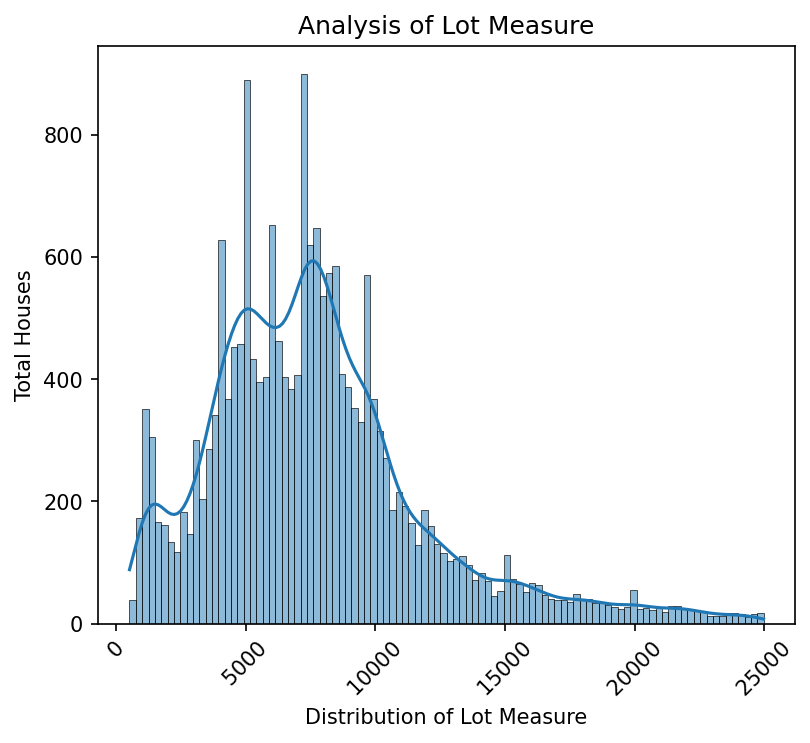

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
plt.title("Analysis of Lot Measure")
plt.xlabel("Distribution of Lot Measure")
plt.ylabel("Total Houses")
truncated_lot = data[data['lot_measure']<25000]
sns.histplot(data=truncated_lot['lot_measure'],bins=100,kde=True)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)
# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter)
plt.savefig('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Visualizations/lot_measure.png',dpi=150,bbox_inches='tight')
# Display the plot
plt.show()

### Number of Floors

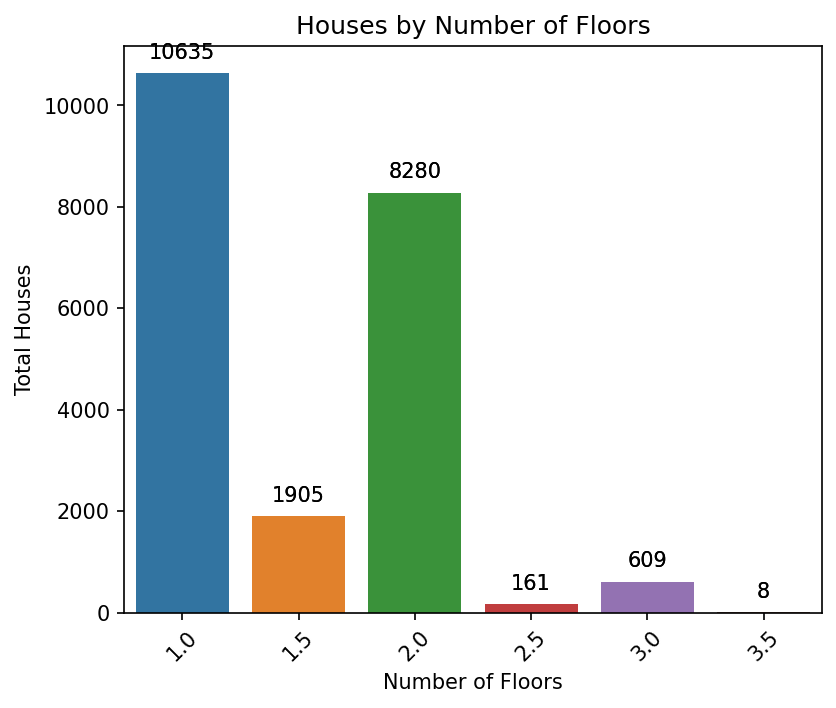

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.countplot(data=data, x='ceil')


# Add bar values
for p in sns.countplot(x='ceil', data=data).patches:
    count = p.get_height()
    plt.annotate(count, (p.get_x() + p.get_width() / 2., count),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points')

# Set labels and title
plt.title('Houses by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Total Houses')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


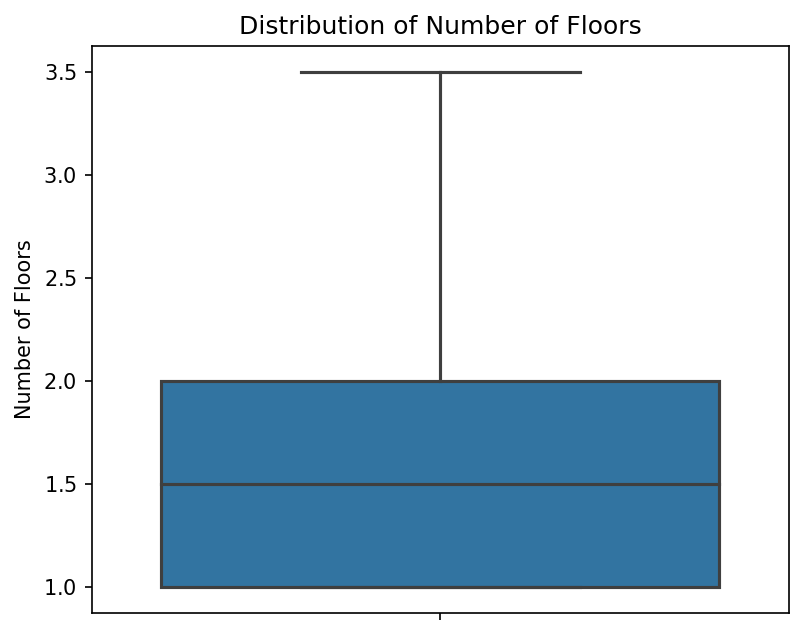

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.boxplot(data=data, y='ceil')

# Set labels and title
plt.ylabel('Number of Floors')
plt.title('Distribution of Number of Floors')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()


### Coast: House which has a view to a waterfront or not

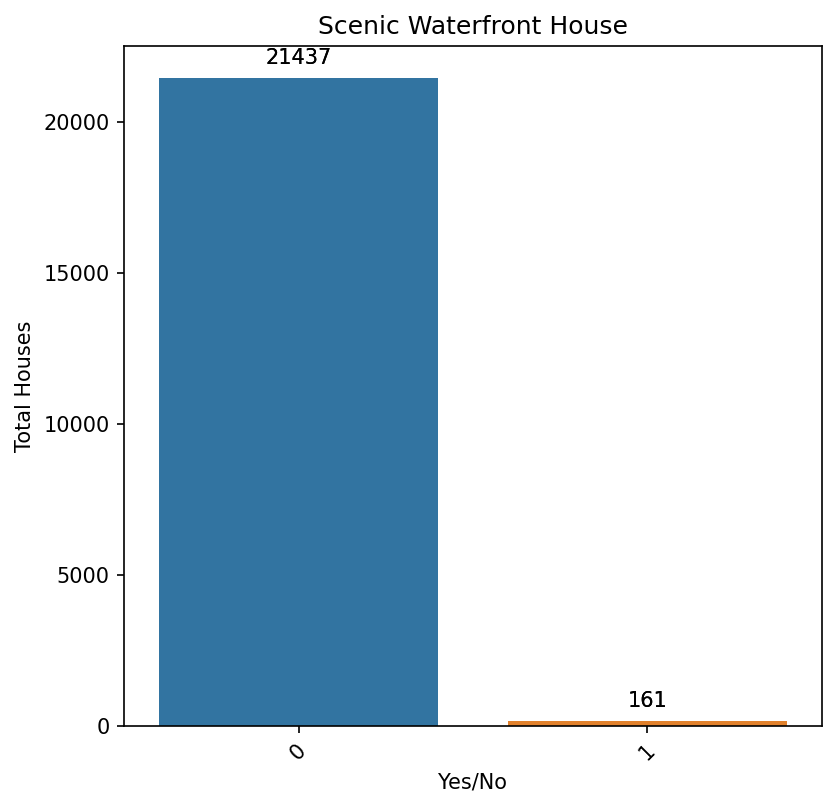

In [ ]:
fig = plt.figure(figsize=(6,6),dpi=150)
sns.countplot(data=data, x='coast')


# Add bar values
for p in sns.countplot(x='coast', data=data).patches:
    count = p.get_height()
    plt.annotate(count, (p.get_x() + p.get_width() / 2., count),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points')

# Set labels and title
plt.xlabel('Yes/No')
plt.ylabel('Total Houses')
plt.title('Scenic Waterfront House')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [ ]:
data['coast'].value_counts()

0    21437
1      161
Name: coast, dtype: int64

### Sight: Has been viewed

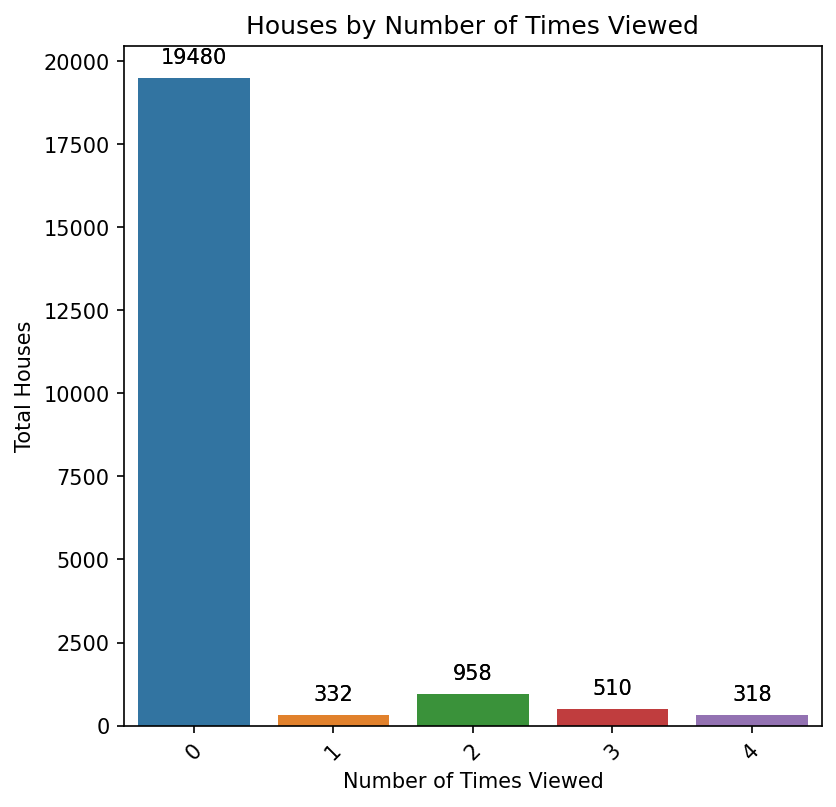

In [ ]:
fig = plt.figure(figsize=(6,6),dpi=150)
sns.countplot(data=data, x='sight')


# Add bar values
for p in sns.countplot(x='sight', data=data).patches:
    count = p.get_height()
    plt.annotate(count, (p.get_x() + p.get_width() / 2., count),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points')

# Set labels and title
plt.title('Houses by Number of Times Viewed')
plt.xlabel('Number of Times Viewed')
plt.ylabel('Total Houses')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


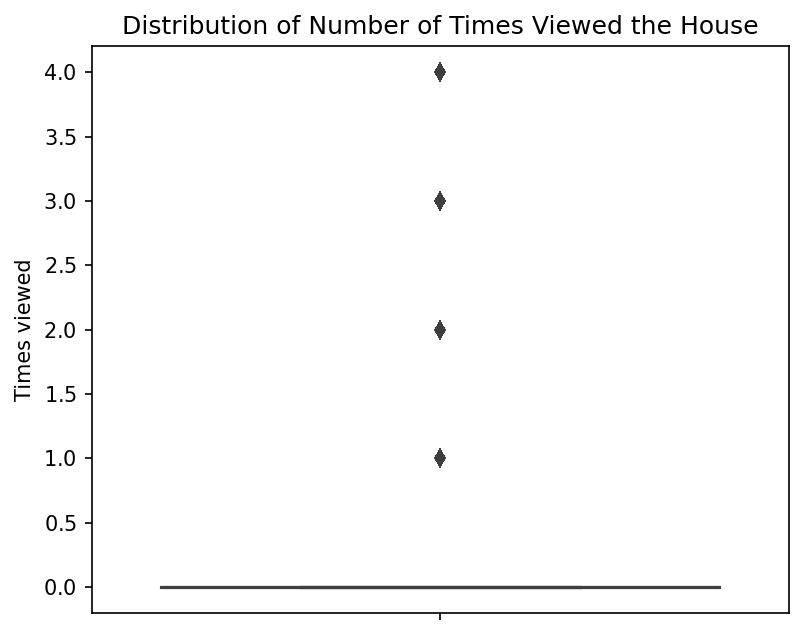

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.boxplot(data=data, y='sight')

# Set labels and title
plt.ylabel('Times viewed')
plt.title('Distribution of Number of Times Viewed the House')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()


### Condition: How good the condition is (Overall)

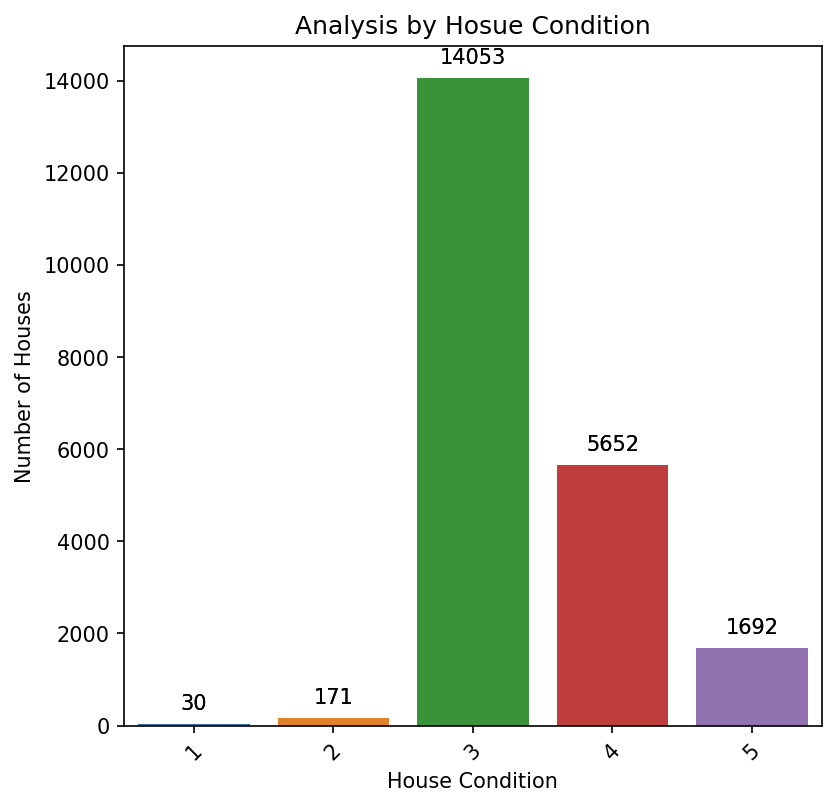

In [ ]:
fig = plt.figure(figsize=(6,6),dpi=150)
sns.countplot(data=data, x='condition')


# Add bar values
for p in sns.countplot(x='condition', data=data).patches:
    count = p.get_height()
    plt.annotate(count, (p.get_x() + p.get_width() / 2., count),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points')

# Set labels and title
plt.title('Analysis by Hosue Condition')
plt.xlabel('House Condition')
plt.ylabel('Number of Houses')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


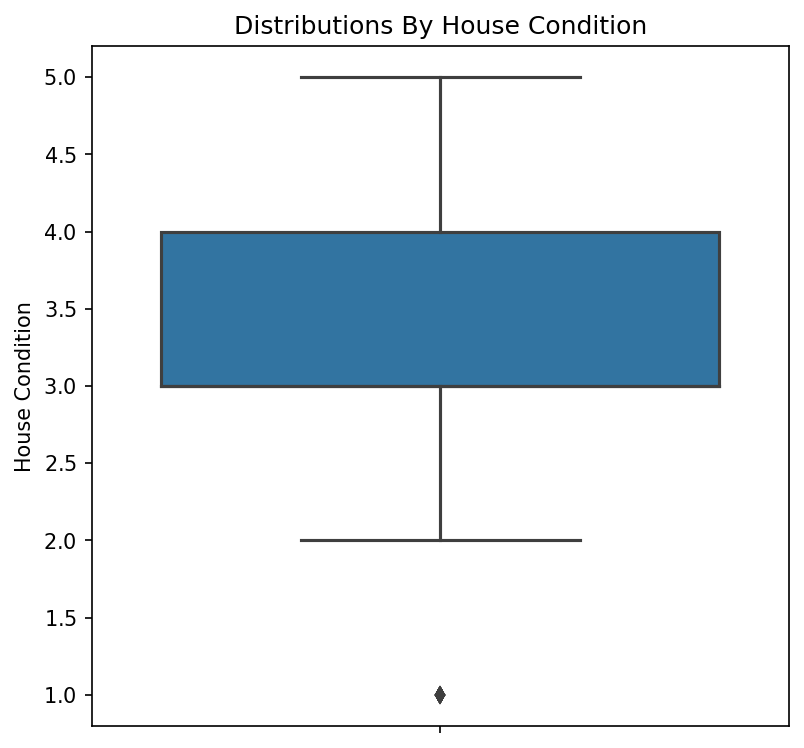

In [ ]:
fig = plt.figure(figsize=(6,6),dpi=150)
sns.boxplot(data=data, y='condition')

# Set labels and title
plt.ylabel('House Condition')
plt.title('Distributions By House Condition')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()


### Quality: Grade given to the housing unit, based on grading system

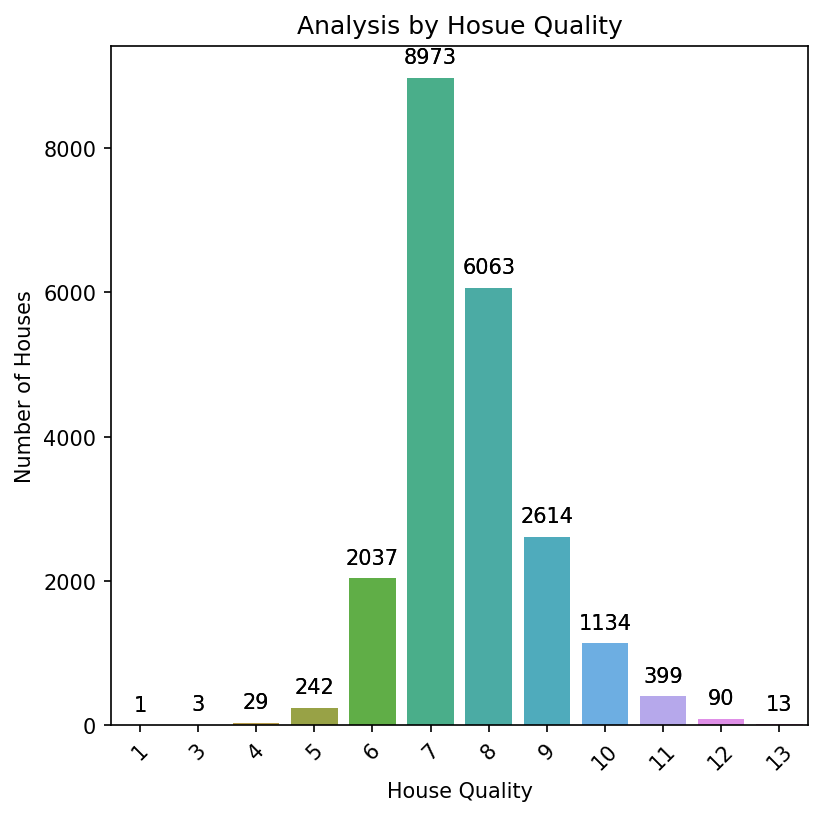

In [ ]:
fig = plt.figure(figsize=(6,6),dpi=150)
sns.countplot(data=data, x='quality')


# Add bar values
for p in sns.countplot(x='quality', data=data).patches:
    count = p.get_height()
    plt.annotate(count, (p.get_x() + p.get_width() / 2., count),
                 ha='center', va='bottom', xytext=(0, 5),
                 textcoords='offset points')

# Set labels and title
plt.title('Analysis by Hosue Quality')
plt.xlabel('House Quality')
plt.ylabel('Number of Houses')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


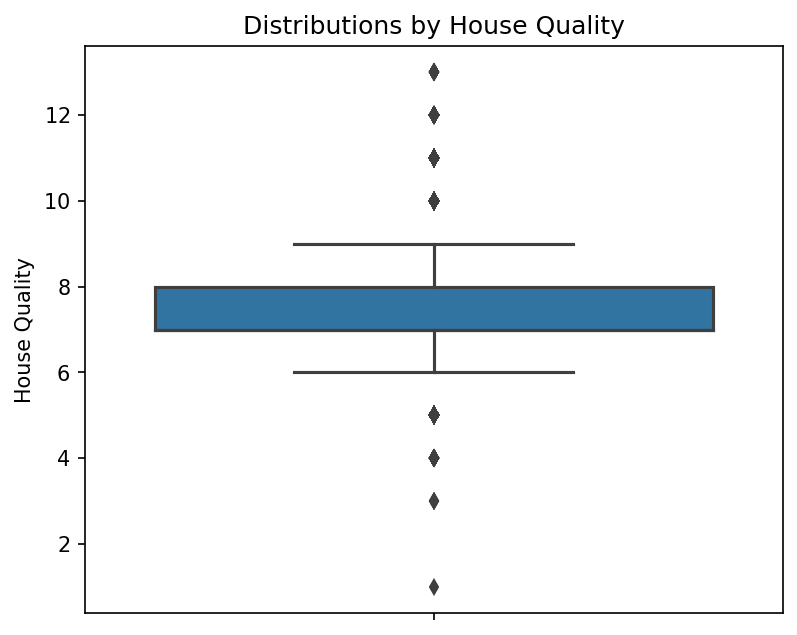

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.boxplot(data=data, y='quality')

# Set labels and title
plt.ylabel('House Quality')
plt.title('Distributions by House Quality')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()


### yr_built: Built Year

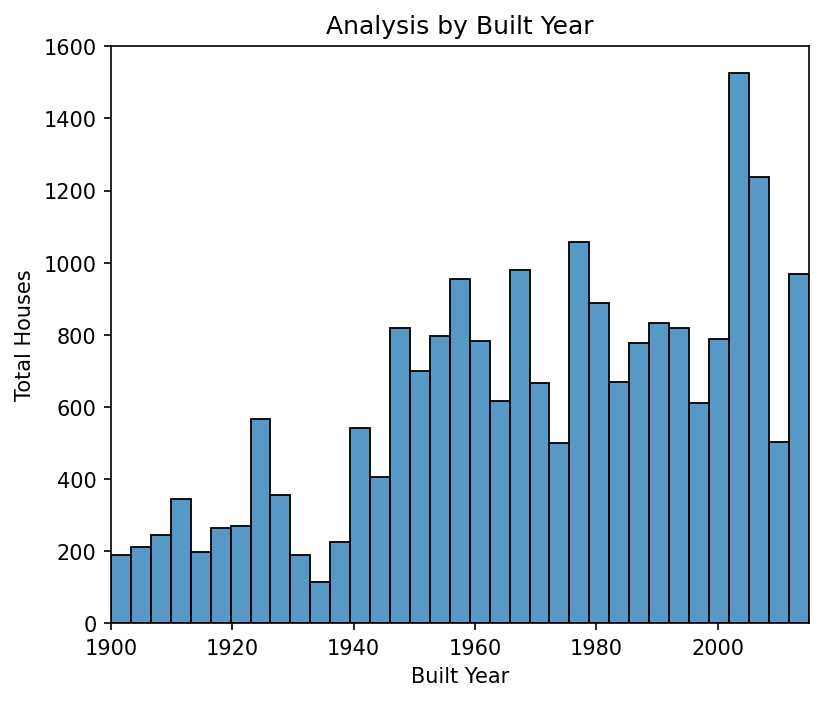

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
plt.title("Analysis by Built Year")
plt.xlabel("Built Year")
plt.ylabel("Total Houses")
hist = sns.histplot(data=data['yr_built'])
hist.set_xlim(left=1900, right=2015)
# Display the plot
plt.savefig('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Visualizations/yr_built_hist.png',dpi=150,bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
print("0.5% properties prices are lower than",np.percentile(data['yr_built'],0.5))
print("1% properties prices are lower than",np.percentile(data['yr_built'],1))
print("5% properties prices are lower than",np.percentile(data['yr_built'],5))
print("10% properties prices are lower than",np.percentile(data['yr_built'],10))
print("25% properties prices are lower than",np.percentile(data['yr_built'],25))
print("50% properties prices are lower than",np.percentile(data['yr_built'],50))
print("75% properties prices are lower than",np.percentile(data['yr_built'],75))
print("90% properties prices are lower than",np.percentile(data['yr_built'],90))
print("95% properties prices are lower than",np.percentile(data['yr_built'],95))
print("99% properties prices are lower than",np.percentile(data['yr_built'],99))
print("99.5% properties prices are lower than",np.percentile(data['yr_built'],99.5))

0.5% properties prices are lower than 1901.0
1% properties prices are lower than 1904.0
5% properties prices are lower than 1915.0
10% properties prices are lower than 1926.0
25% properties prices are lower than 1951.0
50% properties prices are lower than 1975.0
75% properties prices are lower than 1997.0
90% properties prices are lower than 2007.0
95% properties prices are lower than 2011.0
99% properties prices are lower than 2014.0
99.5% properties prices are lower than 2014.0


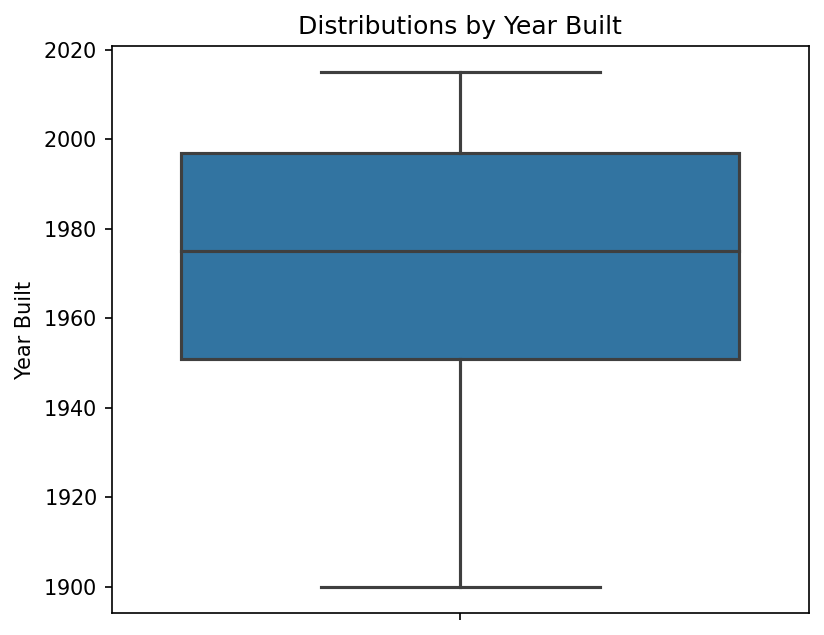

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.boxplot(data=data, y='yr_built')

# Set labels and title
plt.ylabel('Year Built')
plt.title('Distributions by Year Built')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()


### Location - City

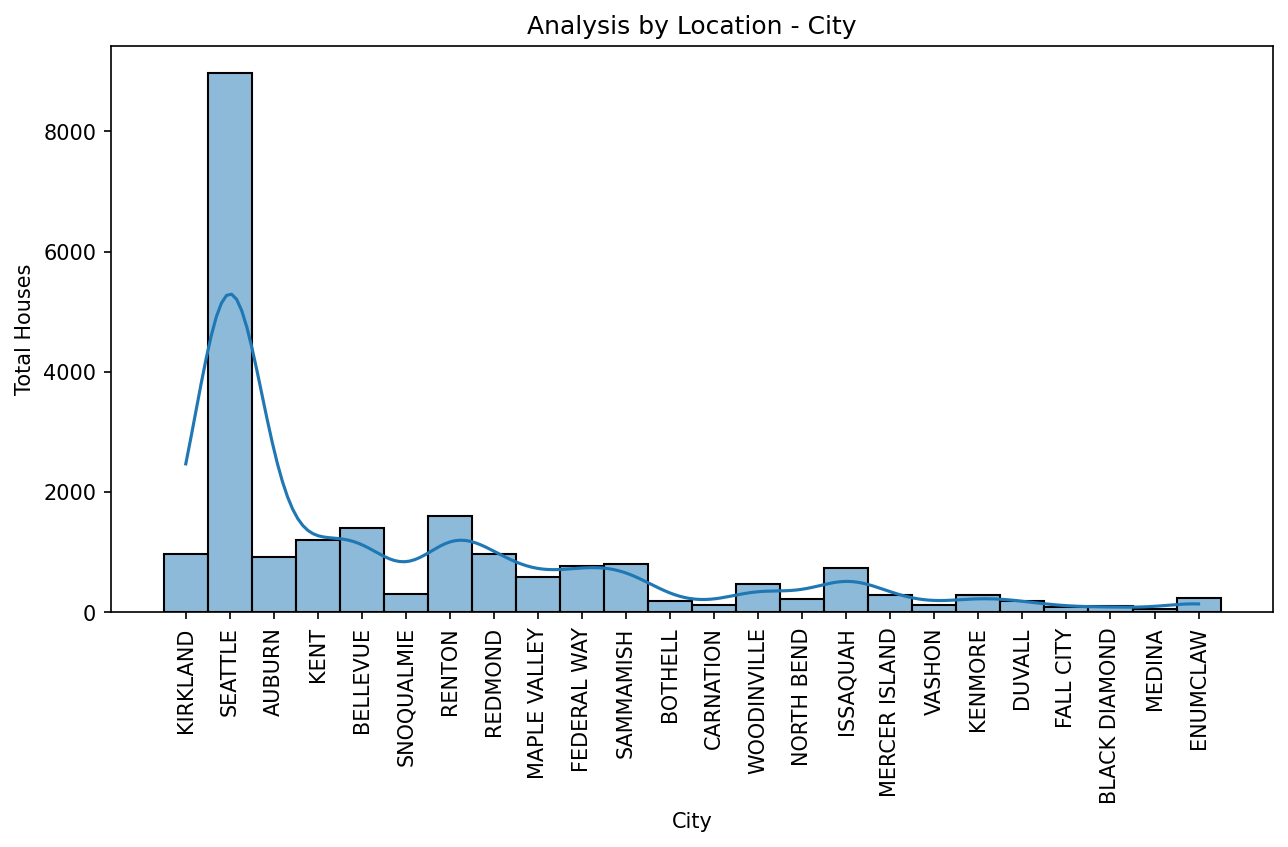

In [ ]:
fig = plt.figure(figsize=(10,5),dpi=150)
plt.title("Analysis by Location - City")
plt.xlabel("City")
plt.ylabel("Total Houses")
sns.histplot(data=data['City'],bins=50,kde=True)

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

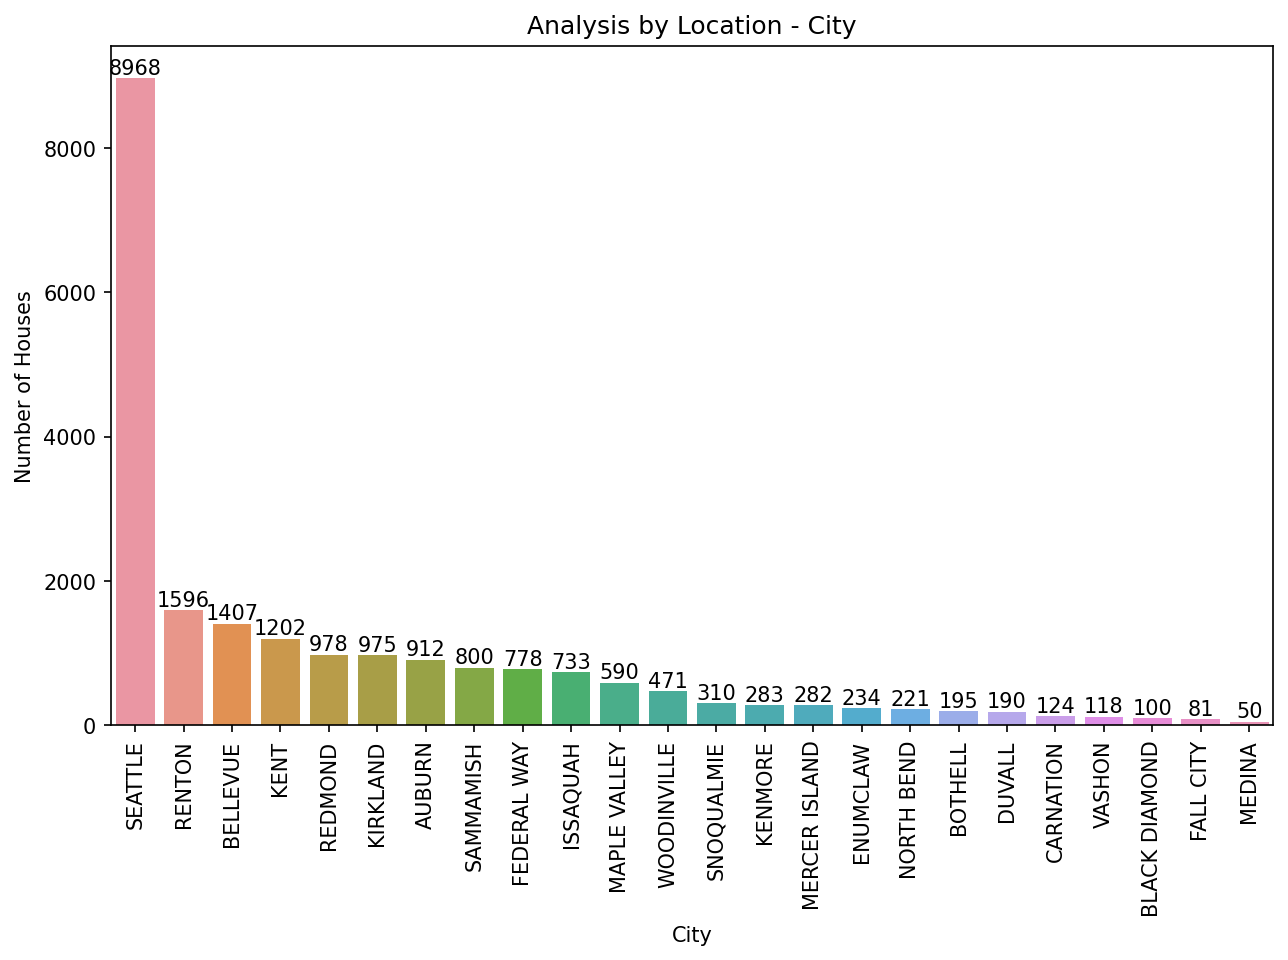

In [ ]:
fig = plt.figure(figsize=(10,6),dpi=150)
#sns.countplot(data=data, x='City')

# Calculate the count of each category
count_data = data['City'].value_counts().reset_index()

# Sort the data in descending order
count_data = count_data.sort_values(by='City', ascending=False)

# Plot the bar chart
#sns.barplot(x='index', y='City', data=count_data)
ax = sns.barplot(x='index', y='City', data=count_data)

# Add bar size annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

# Set labels and title
plt.title('Analysis by Location - City')
plt.xlabel('City')
plt.ylabel('Number of Houses')


# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


## Bivariate Analysis

### Correlation Analysis

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient
correlation, p_value = pearsonr(data['price'], data['room_bed'])

print("Attribute,Coefficient,P-value")
print(f"room_bed,{correlation},{p_value}")

correlation, p_value = pearsonr(data['price'], data['room_bath'])
print(f"room_bath,{correlation},{p_value}")

correlation, p_value = pearsonr(data['price'], data['living_measure'])
print(f"living_measure,{correlation},{p_value}")

correlation, p_value = pearsonr(data['price'], data['lot_measure'])
print(f"lot_measure,{correlation},{p_value}")

correlation, p_value = pearsonr(data['price'], data['ceil'])
print(f"ceil,{correlation},{p_value}")

correlation, p_value = pearsonr(data['price'], data['condition'])
print(f"condition,{correlation},{p_value}")

correlation, p_value = pearsonr(data['price'], data['quality'])
print(f"quality,{correlation},{p_value}")



Attribute,Coefficient,P-value
room_bed,0.3148438260948344,0.0
room_bath,0.5094903912160633,0.0
living_measure,0.7020639967629116,0.0
lot_measure,0.08962998240945606,9.00232761003121e-40
ceil,0.2564896546632053,1.59e-321
condition,0.035424969062106425,1.9142462846322965e-07
quality,0.6674835520588558,0.0


<ipython-input-44-1e1248d4b558>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_corr.corr()


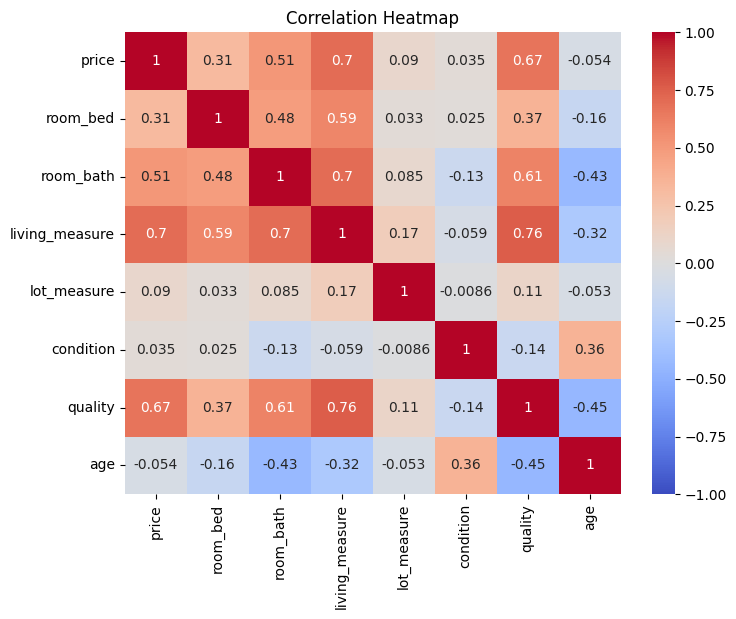

                price  room_bed  room_bath  living_measure  lot_measure  \
price            1.00      0.31       0.51            0.70         0.09   
room_bed         0.31      1.00       0.48            0.59         0.03   
room_bath        0.51      0.48       1.00            0.70         0.09   
living_measure   0.70      0.59       0.70            1.00         0.17   
lot_measure      0.09      0.03       0.09            0.17         1.00   
condition        0.04      0.02      -0.13           -0.06        -0.01   
quality          0.67      0.37       0.61            0.76         0.11   
age             -0.05     -0.16      -0.43           -0.32        -0.05   

                condition  quality   age  
price                0.04     0.67 -0.05  
room_bed             0.02     0.37 -0.16  
room_bath           -0.13     0.61 -0.43  
living_measure      -0.06     0.76 -0.32  
lot_measure         -0.01     0.11 -0.05  
condition            1.00    -0.14  0.36  
quality             -0.

In [ ]:
data_corr = data[['price','room_bed','room_bath','living_measure','lot_measure','condition','quality','age','City'
]]
#data_corr.head()

pd.set_option('display.float_format', '{:.2f}'.format)

correlation_matrix = data_corr.corr()

# Create a heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Heatmap')
plt.savefig('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Visualizations/corr_mat.png',dpi=150,bbox_inches='tight')
# Show the plot
plt.show()

print(correlation_matrix)

### Scatter Plots: To visualize the relationship between housing price and each variable

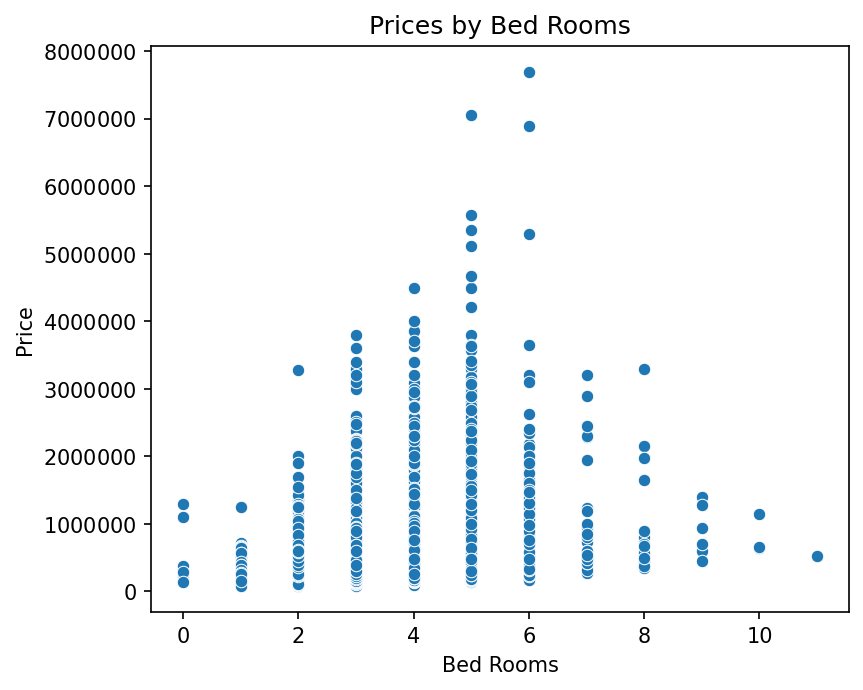

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(data=data, x='room_bed', y='price')

# Set labels and title
plt.xlabel('Bed Rooms')
plt.ylabel('Price')
plt.title('Prices by Bed Rooms')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

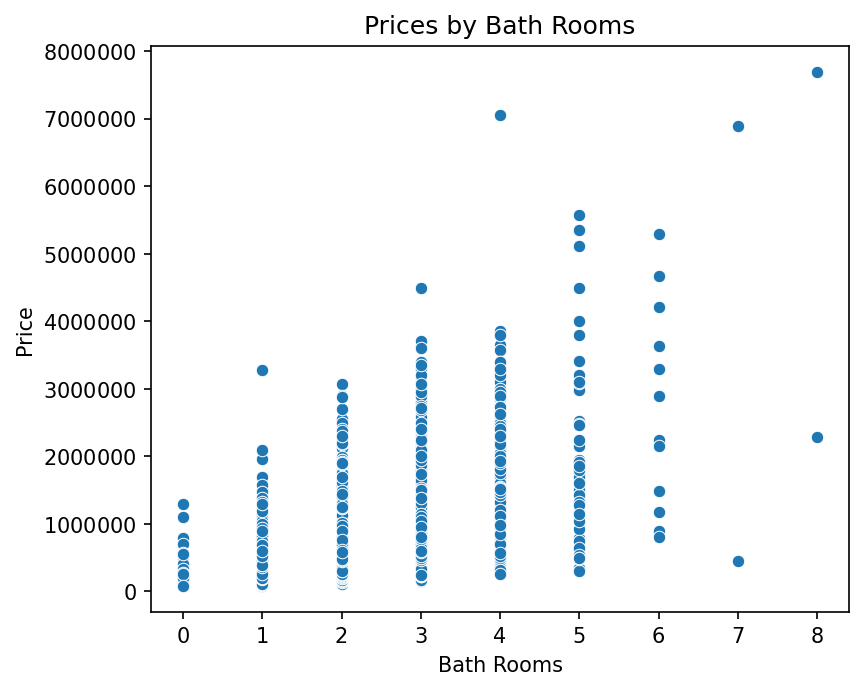

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(data=data, x='room_bath', y='price')

# Set labels and title
plt.xlabel('Bath Rooms')
plt.ylabel('Price')
plt.title('Prices by Bath Rooms')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

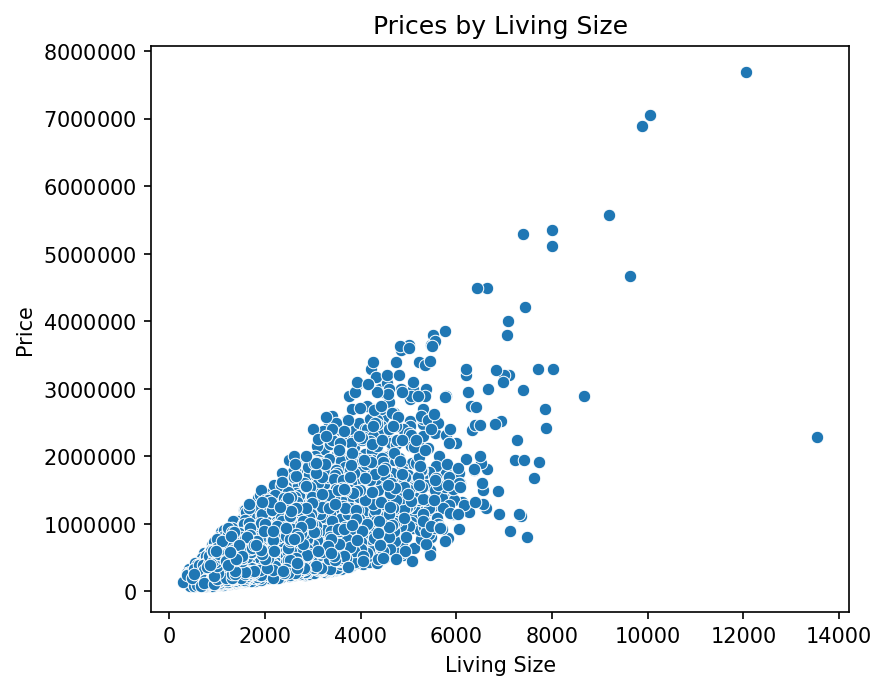

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(data=data, x='living_measure', y='price')

# Set labels and title
plt.xlabel('Living Size')
plt.ylabel('Price')
plt.title('Prices by Living Size')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

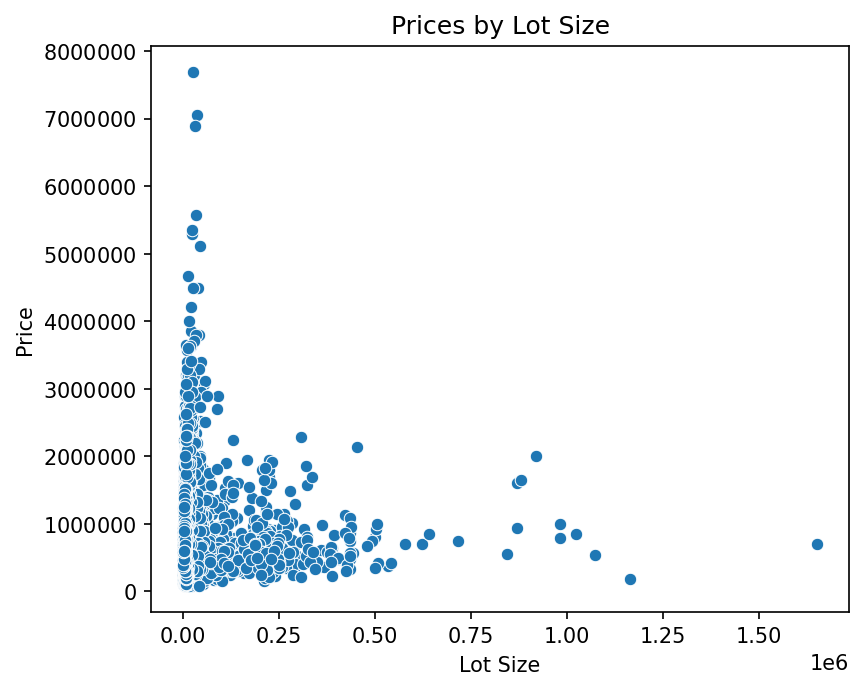

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(data=data, x='lot_measure', y='price')

# Set labels and title
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Prices by Lot Size')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

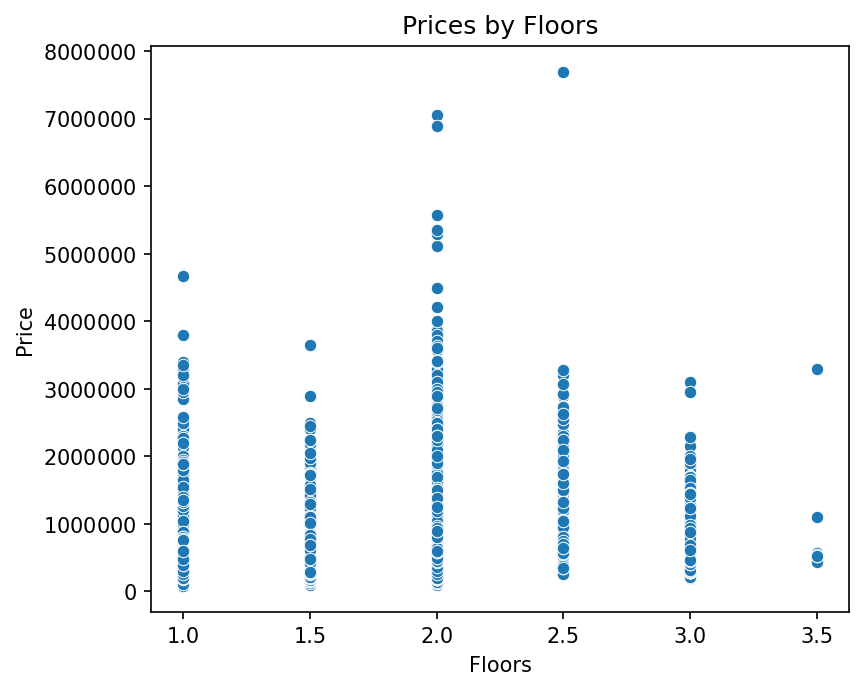

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(data=data, x='ceil', y='price')

# Set labels and title
plt.xlabel('Floors')
plt.ylabel('Price')
plt.title('Prices by Floors')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

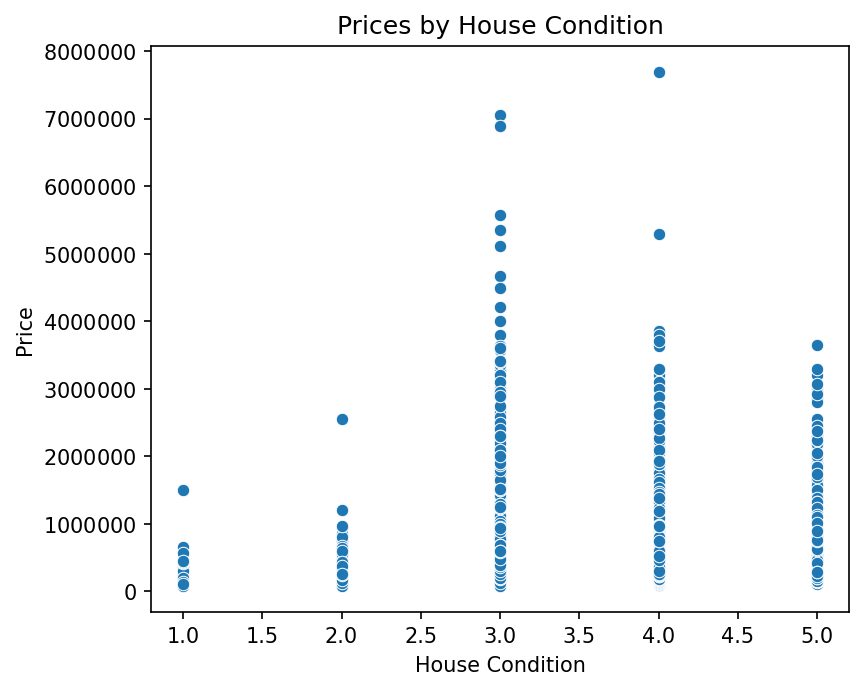

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(data=data, x='condition', y='price')

# Set labels and title
plt.xlabel('House Condition')
plt.ylabel('Price')
plt.title('Prices by House Condition')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

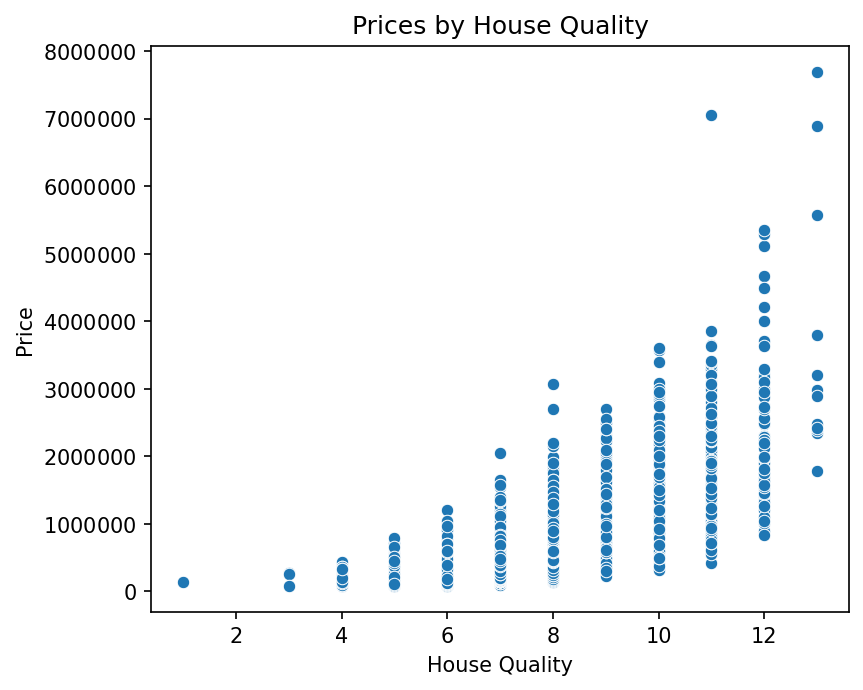

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(data=data, x='quality', y='price')

# Set labels and title
plt.xlabel('House Quality')
plt.ylabel('Price')
plt.title('Prices by House Quality')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

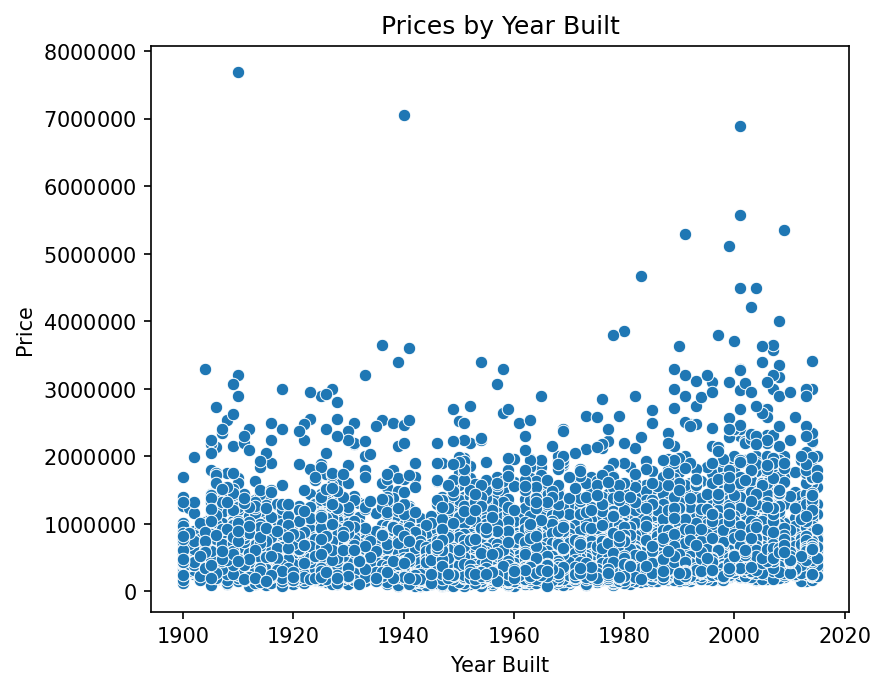

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(data=data, x='yr_built', y='price')

# Set labels and title
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Prices by Year Built')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Display the plot
plt.show()

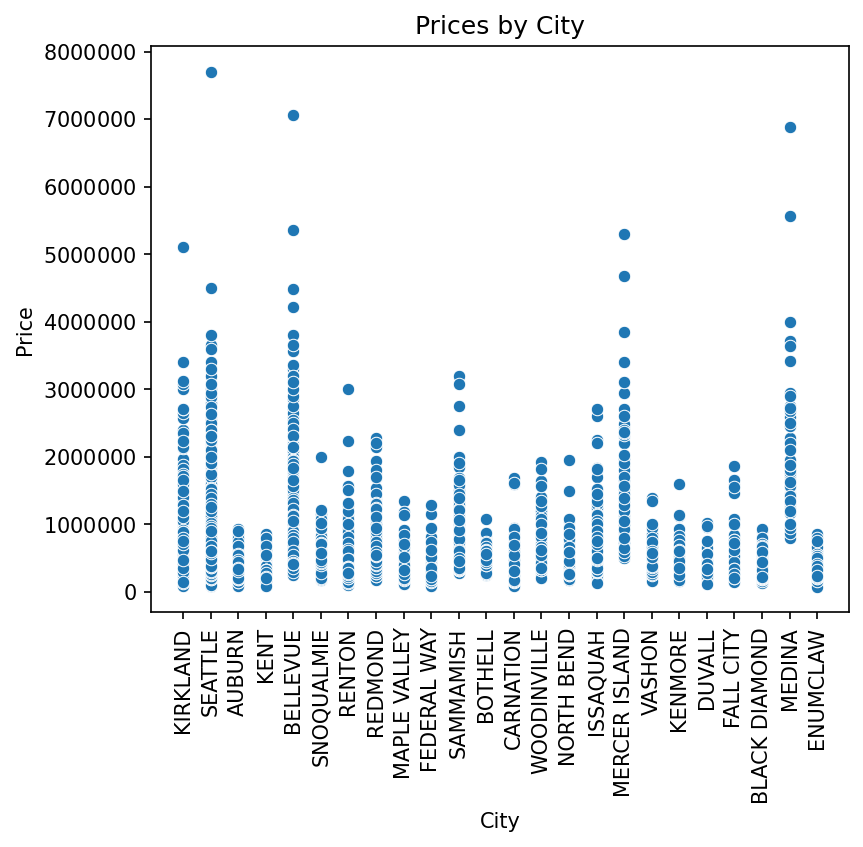

In [ ]:
fig = plt.figure(figsize=(6,5),dpi=150)
sns.scatterplot(data=data, x='City', y='price')

# Set labels and title
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Prices by City')

# Customize the tick labels on the x-axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((0, 6))
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Hypothesis Testing

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Perform one-way ANOVA
grouped_data = data.groupby('City')
groups = [grouped_data.get_group(x)['price'] for x in grouped_data.groups]
f_statistic, p_value = f_oneway(*groups)

print(f"One-Way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


One-Way ANOVA results:
F-statistic: 318.16249277405217
P-value: 0.0


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Perform one-way ANOVA
grouped_data = data.groupby('quality')
groups = [grouped_data.get_group(x)['price'] for x in grouped_data.groups]
f_statistic, p_value = f_oneway(*groups)

print(f"One-Way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


One-Way ANOVA results:
F-statistic: 2124.147331883894
P-value: 0.0


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Perform one-way ANOVA
grouped_data = data.groupby('yr_built')
groups = [grouped_data.get_group(x)['price'] for x in grouped_data.groups]
f_statistic, p_value = f_oneway(*groups)

print(f"One-Way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


One-Way ANOVA results:
F-statistic: 9.889043378696453
P-value: 1.3487176889282262e-162


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Perform one-way ANOVA
grouped_data = data.groupby('room_bath')
groups = [grouped_data.get_group(x)['price'] for x in grouped_data.groups]
f_statistic, p_value = f_oneway(*groups)

print(f"One-Way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


One-Way ANOVA results:
F-statistic: 1209.0653883201362
P-value: 0.0


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Perform one-way ANOVA
grouped_data = data.groupby('room_bed')
groups = [grouped_data.get_group(x)['price'] for x in grouped_data.groups]
f_statistic, p_value = f_oneway(*groups)

print(f"One-Way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


One-Way ANOVA results:
F-statistic: 232.8124065272008
P-value: 0.0


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Perform one-way ANOVA
grouped_data = data.groupby('ceil')
groups = [grouped_data.get_group(x)['price'] for x in grouped_data.groups]
f_statistic, p_value = f_oneway(*groups)

print(f"One-Way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


One-Way ANOVA results:
F-statistic: 397.6938118018891
P-value: 0.0


In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Perform one-way ANOVA
grouped_data = data.groupby('living_measure')
groups = [grouped_data.get_group(x)['price'] for x in grouped_data.groups]
f_statistic, p_value = f_oneway(*groups)

print(f"One-Way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


One-Way ANOVA results:
F-statistic: 32.86923167832267
P-value: 0.0


# Data Modeling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel(f'/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Datasets/cleaned_innercity.xlsx',index_col=None)
scaled_data = pd.read_excel('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Datasets/scaled_data.xlsx',index_col=None)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21598 entries, 0 to 21597
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21598 non-null  int64  
 1   room_bed          21598 non-null  int64  
 2   room_bath         21598 non-null  int64  
 3   living_measure    21598 non-null  float64
 4   lot_measure       21598 non-null  int64  
 5   ceil              21598 non-null  float64
 6   coast             21598 non-null  int64  
 7   sight             21598 non-null  int64  
 8   condition         21598 non-null  int64  
 9   quality           21598 non-null  int64  
 10  ceil_measure      21598 non-null  int64  
 11  basement          21598 non-null  int64  
 12  yr_built          21598 non-null  int64  
 13  yr_renovated      21598 non-null  int64  
 14  living_measure15  21598 non-null  int64  
 15  lot_measure15     21598 non-null  int64  
 16  furnished         21598 non-null  int64 

In [ ]:
data.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,yr_built,yr_renovated,living_measure15,lot_measure15,furnished,year,month,day,age,City
0,600000,4,1,3050.0,9440,1.0,0,0,3,8,...,1966,0,2020,8660,0,2015,4,27,49,KIRKLAND
1,190000,2,1,670.0,3101,1.0,0,0,4,6,...,1948,0,1660,4100,0,2015,3,17,67,SEATTLE
2,735000,4,2,3040.0,2415,2.0,1,4,3,8,...,1966,0,2620,2433,0,2014,8,20,49,SEATTLE
3,257000,3,2,1740.0,3721,2.0,0,0,3,8,...,2009,0,2030,3794,0,2014,10,10,6,AUBURN
4,450000,2,1,1120.0,4590,1.0,0,0,3,7,...,1924,0,1120,5100,0,2015,2,18,91,SEATTLE


In [ ]:
scaled_data.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement_measure,yr_built,living_measure15,lot_measure15,furnished,City
0,0.464396,1,-1,1.017857,0.324151,-0.5,0,0,0,1,0.235294,2.232143,-0.195652,0.206897,0.208835,0,12
1,-0.804954,-1,-1,-1.107143,-0.804237,-0.5,0,0,1,-1,-0.872549,0.000000,-0.586957,-0.206897,-0.706827,0,20
2,0.882353,1,0,1.008929,-0.926350,0.5,1,4,0,1,1.450980,0.000000,-0.195652,0.896552,-1.041566,0,20
3,-0.597523,0,0,-0.151786,-0.693872,0.5,0,0,0,1,0.176471,0.000000,0.739130,0.218391,-0.768273,0,0
4,0.000000,-1,-1,-0.705357,-0.539184,-0.5,0,0,0,0,-0.431373,0.000000,-1.108696,-0.827586,-0.506024,0,20


In [ ]:
features = scaled_data[['room_bed','room_bath','living_measure']]
features.head()

,room_bed,room_bath,living_measure
0,1,-1,1.017857
1,-1,-1,-1.107143
2,1,0,1.008929
3,0,0,-0.151786
4,-1,-1,-0.705357


In [ ]:
# Extract the data between the 25th and 75th percentiles
lower_bound = data['living_measure'].quantile(0.25)
upper_bound = data['living_measure'].quantile(0.75)
filtered_data = data[(data['living_measure'] >= lower_bound) & (data['living_measure'] <= upper_bound)].dropna()

# Print the extracted data
filtered_data.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,yr_built,yr_renovated,living_measure15,lot_measure15,furnished,year,month,day,age,City
3,257000,3,2,1740.0,3721,2.0,0,0,3,8,...,2009,0,2030,3794,0,2014,10,10,6,AUBURN
5,245000,3,2,1610.0,7223,2.0,0,0,3,7,...,1994,0,1610,7162,0,2014,7,9,21,KENT
9,299950,2,1,1460.0,10506,1.0,0,0,3,7,...,1983,0,1460,8153,0,2014,10,28,32,KENT
11,550000,3,1,1520.0,2500,1.5,0,0,3,8,...,1912,0,1880,3600,0,2015,1,23,103,SEATTLE
12,480000,3,2,2450.0,28185,2.0,0,0,3,9,...,1990,0,2440,33541,1,2014,10,29,25,RENTON


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score


# Select the features and target variable
features = scaled_data[['room_bed','room_bath','living_measure','lot_measure','ceil','condition','quality','ceil_measure','furnished']]
#features = data[['living_measure','quality','ceil_measure','living_measure15','furnished','room_bath','ceil','age']]
target = scaled_data[['price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)


# Evaluate the model using mean squared error
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)

# Calculate the R-squared value
train_r_squared = model.score(X_train, y_train)
test_r_squared = model.score(X_test, y_test)

# Compute the adjusted R-squared
train_n = len(X_train) # Number of samples in the train set
test_n = len(X_test)  # Number of samples in the test set

p = len(features)  # Number of features

adjusted_train_r_squared = 1 - (1 - train_r_squared) * (train_n - 1) / (train_n - p - 1)
adjusted_test_r_squared = 1 - (1 - test_r_squared) * (test_n - 1) / (test_n - p - 1)


print('Model,Train RMSE, Test RMSE, Train Adj R-squared,Test Adj R-squared')
print(type(model).__name__,',',train_rmse,',',test_rmse,',',adjusted_train_r_squared,',',adjusted_test_r_squared)

scores = cross_val_score(model, features, target, cv = 5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Model,Train RMSE, Test RMSE, Train Adj R-squared,Test Adj R-squared
LinearRegression , 0.7569616675350598 , 0.7297776494839522 , 2.7354882310227913 , 1.1118899048060422
Cross Validation Scores:  [0.56611274 0.56712776 0.54596893 0.55071976 0.58206611]
Average CV Score:  0.5623990584411458
Number of CV Scores used in Average:  5


### Decision Tree Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Select the features and target variable
# Select the features and target variable
features = scaled_data[['room_bed','room_bath','living_measure','lot_measure','ceil','condition','quality','ceil_measure','furnished','City','living_measure15','lot_measure15']]
#features = data[['living_measure','quality','ceil_measure','living_measure15','furnished','room_bath','ceil','age']]
target = scaled_data[['price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an instance of the DecisionTreeRegressor
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)


# Evaluate the model using mean squared error
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)

# Calculate the R-squared value
train_r_squared = model.score(X_train, y_train)
test_r_squared = model.score(X_test, y_test)

# Compute the adjusted R-squared
train_n = len(X_train) # Number of samples in the train set
test_n = len(X_test)  # Number of samples in the test set

p = len(features)  # Number of features

adjusted_train_r_squared = 1 - (1 - train_r_squared) * (train_n - 1) / (train_n - p - 1)
adjusted_test_r_squared = 1 - (1 - test_r_squared) * (test_n - 1) / (test_n - p - 1)


print('Model,Train RMSE, Test RMSE, Train Adj R-squared,Test Adj R-squared')
print(type(model).__name__,',',train_rmse,',',test_rmse,',',adjusted_train_r_squared,',',adjusted_test_r_squared)

scores = cross_val_score(model, features, target, cv = 5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Model,Train RMSE, Test RMSE, Train Adj R-squared,Test Adj R-squared
DecisionTreeRegressor , 0.02877808522305991 , 0.7759092347527646 , 1.0025084051675748 , 1.1264828460566714
Cross Validation Scores:  [0.515181   0.5097637  0.50392804 0.53142091 0.52565866]
Average CV Score:  0.5171904615465867
Number of CV Scores used in Average:  5


### Random Forest Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select the features and target variable
# Select the features and target variable
features = scaled_data[['room_bed','room_bath','living_measure','lot_measure','ceil','condition','quality','ceil_measure','furnished']]
#features = data[['living_measure','quality','ceil_measure','living_measure15','furnished','room_bath','ceil','age']]
target = scaled_data[['price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Create an instance of the Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)


# Evaluate the model using mean squared error
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)

# Calculate the R-squared value
train_r_squared = model.score(X_train, y_train)
test_r_squared = model.score(X_test, y_test)

# Compute the adjusted R-squared
train_n = len(X_train) # Number of samples in the train set
test_n = len(X_test)  # Number of samples in the test set

p = len(features)  # Number of features

adjusted_train_r_squared = 1 - (1 - train_r_squared) * (train_n - 1) / (train_n - p - 1)
adjusted_test_r_squared = 1 - (1 - test_r_squared) * (test_n - 1) / (test_n - p - 1)


print('Model,Train RMSE, Test RMSE, Train Adj R-squared,Test Adj R-squared')
print(type(model).__name__,',',train_rmse,',',test_rmse,',',adjusted_train_r_squared,',',adjusted_test_r_squared)

scores = cross_val_score(model, features, target, cv = 5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

<ipython-input-11-d540b156c1a3>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Model,Train RMSE, Test RMSE, Train Adj R-squared,Test Adj R-squared
RandomForestRegressor , 0.25525294796733367 , 0.6776138195261984 , 1.1127595511735437 , 1.1683428958203086


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross Validation Scores:  [0.6455556  0.5988275  0.65366854 0.61827937 0.66289571]
Average CV Score:  0.6358453450156794
Number of CV Scores used in Average:  5


### KNN Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Select the features and target variable
# Select the features and target variable
features = scaled_data[['room_bed','room_bath','living_measure','lot_measure','ceil','condition','quality','ceil_measure','furnished','City','living_measure15']]
#features = data[['living_measure','quality','ceil_measure','living_measure15','furnished','room_bath','ceil','age']]
target = scaled_data[['price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an instance of the KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors = 6)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)


# Evaluate the model using mean squared error
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)

# Calculate the R-squared value
train_r_squared = model.score(X_train, y_train)
test_r_squared = model.score(X_test, y_test)

# Compute the adjusted R-squared
train_n = len(X_train) # Number of samples in the train set
test_n = len(X_test)  # Number of samples in the test set

p = len(features)  # Number of features

adjusted_train_r_squared = 1 - (1 - train_r_squared) * (train_n - 1) / (train_n - p - 1)
adjusted_test_r_squared = 1 - (1 - test_r_squared) * (test_n - 1) / (test_n - p - 1)


print('Model,Train RMSE, Test RMSE, Train Adj R-squared,Test Adj R-squared')
print(type(model).__name__,',',train_rmse,',',test_rmse,',',adjusted_train_r_squared,',',adjusted_test_r_squared)

scores = cross_val_score(model, features, target, cv = 5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Model,Train RMSE, Test RMSE, Train Adj R-squared,Test Adj R-squared
KNeighborsRegressor , 0.49867869867750175 , 0.5571068882856415 , 1.7532090560958062 , 1.0652058925918633
Cross Validation Scores:  [0.7317144  0.74579207 0.71880971 0.72409877 0.7543173 ]
Average CV Score:  0.7349464510553357
Number of CV Scores used in Average:  5



### ANN Regression

In [ ]:
#!pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Select the features and target variable
features = scaled_data[['room_bed','room_bath','living_measure','lot_measure','ceil','condition','quality','ceil_measure','furnished','City','living_measure15','lot_measure15','sight']]
#features = data[['living_measure','quality','ceil_measure','living_measure15','furnished','room_bath','ceil','age']]
target = scaled_data[['price']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features using Min-Max scaling
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Create the ANN model
model = Sequential()
model.add(Dense(32, activation='relu'))#, input_shape=(len(features),)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = np.mean((y_pred - y_test) ** 2)

# Make predictions on the testing data
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)


# Evaluate the model using mean squared error
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)

# Calculate the R-squared value
# train_r_squared = model.score(X_train, y_train)
# test_r_squared = model.score(X_test, y_test)
train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)


# Compute the adjusted R-squared
train_n = len(X_train) # Number of samples in the train set
test_n = len(X_test)  # Number of samples in the test set

p = len(features)  # Number of features

adjusted_train_r_squared = 1 - (1 - train_r_squared) * (train_n - 1) / (train_n - p - 1)
adjusted_test_r_squared = 1 - (1 - test_r_squared) * (test_n - 1) / (test_n - p - 1)


print('Model,Train RMSE, Test RMSE, Train Adj R-squared,Test Adj R-squared')
print(type(model).__name__,',',train_rmse,',',test_rmse,',',adjusted_train_r_squared,',',adjusted_test_r_squared)


Epoch 1/50
540/540 [==============================] - 2s 2ms/step - loss: 2.2458
Epoch 2/50
540/540 [==============================] - 1s 2ms/step - loss: 0.4705
Epoch 3/50
540/540 [==============================] - 1s 2ms/step - loss: 0.4386
Epoch 4/50
540/540 [==============================] - 1s 2ms/step - loss: 0.4111
Epoch 5/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3988
Epoch 6/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3940
Epoch 7/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3823
Epoch 8/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3790
Epoch 9/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3719
Epoch 10/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3649
Epoch 11/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3647
Epoch 12/50
540/540 [==============================] - 1s 2ms/step - loss: 0.3645
Epoch 13/50
540/540 [====

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


135/135 [==============================] - 0s 1ms/step
Model,Train RMSE, Test RMSE, Train Adj R-squared,Test Adj R-squared
Sequential , 0.5232465014425788 , 0.5625713083238869 , 1.829252070386353 , 1.0664913186043972


In [ ]:
# scores = cross_val_score(model, features, target, cv = 5)
score = model.evaluate(X_test,y_test,verbose=0)
score_train = model.evaluate(X_train,y_train,verbose=0)

print("Total Loss Test: ", score)
print("Total Loss Train: ", score_train)
#print("Average CV Score: ", scores.mean())
#print("Number of CV Scores used in Average: ", len(scores))
#print("MSE : ",mse)

Total Loss Test:  0.3164864778518677
Total Loss Train:  0.27378687262535095


#Boosting Algorithms

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
import pandas as pd
import lightgbm as lgbm
import xgboost as xg
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor=x, transformer=QuantileTransformer(output_distribution='normal'))
    regr_trans.fit(X_train, y_train)
    yhat = regr_trans.predict(X_test)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

In [ ]:
algo=[GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor()]
score=[]
for i in algo:
    score.append(boost_models(i))

 #Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'Score', 'MAE', 'RMSE'])

,Model,Score,MAE,RMSE
0,GradientBoostingRegressor,0.698,0.33,0.60
1,LGBMRegressor,0.808,0.28,0.48
2,XGBRFRegressor,0.585,0.39,0.70


#Model Tuning

##Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)


# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [6,9,15,20,23]}]

# Search for best hyperparameters
grid = GridSearchCV(estimator=KNeighborsRegressor(),
                      param_grid=hp_candidates,
                      cv=5,
                      verbose=2,
                      scoring='r2',
                      return_train_score=True)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=6; total time=   0.3s
[CV] END ......................................n_neighbors=6; total time=   0.3s
[CV] END ......................................n_neighbors=6; total time=   0.2s
[CV] END ......................................n_neighbors=6; total time=   0.2s
[CV] END ......................................n_neighbors=6; total time=   0.3s
[CV] END ......................................n_neighbors=9; total time=   0.3s
[CV] END ......................................n_neighbors=9; total time=   0.3s
[CV] END ......................................n_neighbors=9; total time=   0.4s
[CV] END ......................................n_neighbors=9; total time=   0.4s
[CV] END ......................................n_neighbors=9; total time=   0.5s
[CV] END .....................................n_neighbors=15; total time=   0.3s
[CV] END .....................................n_n

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [6, 9, 15, 20, 23]}],
             return_train_score=True, scoring='r2', verbose=2)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7217151877231734
{'n_neighbors': 9}
KNeighborsRegressor(n_neighbors=9)


##Light Gradient Boosting Algorithm with tuned params

In [ ]:
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }


gsearch = GridSearchCV(estimator=lgbm.LGBMRegressor(), param_grid=param_grid, cv=10)
lgb_model = gsearch.fit(X=X_train, y=y_train)

print(lgb_model.best_params_, lgb_model.best_score_)

In [ ]:
import pickle
with open('/content/drive/MyDrive/Capstone Project MCA-DS House Price Prediction/Interim Report/lgbmmodel.pkl','rb') as f:
  lgb_model = pickle.load(f)

In [ ]:
print(lgb_model.best_score_,lgb_model.best_estimator_)

0.7620768643552179 LGBMRegressor(lambda_l1=1.5, lambda_l2=0, min_data_in_leaf=30, reg_alpha=0.1)


#Feature Engineering

In [ ]:
features = ['price','living_measure','lot_measure','ceil_measure','living_measure15','lot_measure15','basement_measure']

In [ ]:
lower_bound = scaled_data['living_measure'].quantile(0.25)
upper_bound = scaled_data['living_measure'].quantile(0.75)
filtered_data = scaled_data[(scaled_data['living_measure'] >= lower_bound) & (scaled_data['living_measure'] <= upper_bound)]

In [ ]:
filtered_data = scaled_data.copy()

In [ ]:
for i in features:
    q25, q75 = np.quantile(filtered_data[i], 0.10), np.quantile(filtered_data[i], 0.85)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    filtered_data = filtered_data[(filtered_data[i] >= lower) & (filtered_data[i] <= upper)]
    df1 = scaled_data[scaled_data[i] > upper]
    df2 = scaled_data[scaled_data[i] < lower]
    print('Total number of outliers in '+i+' are', df1.shape[0]+ df2.shape[0])

Total number of outliers in price are 451
Total number of outliers in living_measure are 109
Total number of outliers in lot_measure are 1657
Total number of outliers in ceil_measure are 115
Total number of outliers in living_measure15 are 92
Total number of outliers in lot_measure15 are 1812
Total number of outliers in basement_measure are 77


In [ ]:
filtered_data.describe()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement_measure,yr_built,living_measure15,lot_measure15,furnished,City
count,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000,19115.000000
mean,0.129219,0.332043,-0.307193,0.040449,-0.003205,-0.015982,0.002563,0.185456,0.408632,0.527544,0.117631,0.491521,-0.106749,0.065284,-0.061213,0.155061,15.166623
std,0.765892,0.892387,0.671555,0.678817,0.742905,0.543512,0.050567,0.666056,0.650302,1.035881,0.688630,0.727844,0.650570,0.695428,0.689714,0.361973,6.601983
min,-1.151703,-3.000000,-2.000000,-1.375000,-1.263673,-0.500000,0.000000,0.000000,-2.000000,-4.000000,-1.166667,0.000000,-1.630435,-1.586207,-1.399398,0.000000,0.000000
25%,-0.424906,0.000000,-1.000000,-0.464286,-0.481955,-0.500000,0.000000,0.000000,0.000000,0.000000,-0.392157,0.000000,-0.543478,-0.436782,-0.526104,0.000000,11.000000
50%,-0.046440,0.000000,0.000000,-0.062500,-0.074051,-0.500000,0.000000,0.000000,0.000000,0.000000,-0.058824,0.000000,-0.065217,-0.068966,-0.073896,0.000000,19.000000
75%,0.492260,1.000000,0.000000,0.446429,0.335099,0.500000,0.000000,0.000000,1.000000,1.000000,0.490196,0.964286,0.478261,0.448276,0.299598,0.000000,20.000000
max,3.498452,8.000000,5.000000,3.223214,4.138668,2.000000,1.000000,4.000000,2.000000,5.000000,3.098039,3.571429,0.869565,3.068966,2.737952,1.000000,23.000000


In [ ]:
scaled_data.describe()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement_measure,yr_built,living_measure15,lot_measure15,furnished,City
count,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000,21598.000000
mean,0.279407,0.368367,-0.248819,0.151962,1.330788,-0.004028,0.007454,0.233818,0.407677,0.657052,0.224186,0.520593,-0.086685,0.167886,1.032750,0.196546,14.916705
std,1.137632,0.906452,0.733600,0.819829,7.369226,0.539741,0.086018,0.765669,0.649882,1.175698,0.812003,0.790257,0.638576,0.785305,5.477564,0.397395,6.765471
min,-1.160991,-3.000000,-2.000000,-1.446429,-1.263673,-0.500000,0.000000,0.000000,-2.000000,-6.000000,-1.245098,0.000000,-1.630435,-1.656322,-1.399398,0.000000,0.000000
25%,-0.396285,0.000000,-1.000000,-0.428571,-0.458547,-0.500000,0.000000,0.000000,0.000000,0.000000,-0.362745,0.000000,-0.521739,-0.402299,-0.506024,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
75%,0.603715,1.000000,0.000000,0.571429,0.541453,0.500000,0.000000,0.000000,1.000000,1.000000,0.637255,1.000000,0.478261,0.597701,0.493976,0.000000,20.000000
max,22.445820,8.000000,6.000000,10.383929,292.597570,2.000000,1.000000,4.000000,2.000000,6.000000,7.696078,8.607143,0.869565,5.022989,173.409639,1.000000,23.000000


In [ ]:
data.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,yr_built,yr_renovated,living_measure15,lot_measure15,furnished,year,month,day,age,City
0,600000,4,1,3050.0,9440,1.0,0,0,3,8,...,1966,0,2020,8660,0,2015,4,27,49,KIRKLAND
1,190000,2,1,670.0,3101,1.0,0,0,4,6,...,1948,0,1660,4100,0,2015,3,17,67,SEATTLE
2,735000,4,2,3040.0,2415,2.0,1,4,3,8,...,1966,0,2620,2433,0,2014,8,20,49,SEATTLE
3,257000,3,2,1740.0,3721,2.0,0,0,3,8,...,2009,0,2030,3794,0,2014,10,10,6,AUBURN
4,450000,2,1,1120.0,4590,1.0,0,0,3,7,...,1924,0,1120,5100,0,2015,2,18,91,SEATTLE


In [ ]:
features = filtered_data[['room_bed','room_bath','living_measure','lot_measure','ceil','condition','quality','ceil_measure','furnished','City','living_measure15','sight','basement_measure']]
features["age"] = data["age"]
target = filtered_data[['price']]

<ipython-input-45-26bd9ebb76c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["age"] = data["age"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
lg = lgbm.LGBMRegressor(lambda_l1=1.5, lambda_l2=0, min_data_in_leaf=30, reg_alpha=0.1)
lg.fit(X_train,y_train)

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


LGBMRegressor(lambda_l1=1.5, lambda_l2=0, min_data_in_leaf=30, reg_alpha=0.1)

In [ ]:
print("Train score for LGBM Regressor: ",lg.score(X_train,y_train))
print("Test score for LGBM Regressor: ",lg.score(X_test,y_test))

Train score for LGBM Regressor:  0.844346090712069
Test score for LGBM Regressor:  0.8006798041122201
